## TFM

### DATASETS

In [ ]:
#[BreakHis] https://www.kaggle.com/datasets/ambarish/breakhis/data?select=Folds.csv
# [datasets]  https://data.mendeley.com/datasets/jxwvdwhpc2/1
#[BreCaHAD] https://figshare.com/articles/dataset/BreCaHAD_A_Dataset_for_Breast_Cancer_Histopathological_Annotation_and_Diagnosis/7379186


## EDA DEL DATASETS

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks"

'clasificacion multiclase'   flood-area-segmentation	       TFM_EDA.ipynb
'Copia de tfm (1).ipynb'     hiperparametros_tfm.ipynb	       tfm.ipynb
'Copia de tfm.ipynb'	     skin-cancer-malignant-vs-benign


✅ Flujo de trabajo completo
### 1. 🧐 Análisis Exploratorio de Datos (EDA)
Objetivo: Conocer y entender el dataset de imágenes.
- Cargar el dataset: comprobar número de imágenes por clase, tamaño, formato.
- Visualizar muestras por clase (benignas, malignas, tipos específicos).
- Verificar si el dataset está balanceado.
- Comprobar metadatos (resolución, color/grises, nombres de archivos, etiquetas).
- Estadísticas básicas: dimensiones, distribución de clases, valores de píxeles.
- Analizar la fuente de datos: ¿mamografías, histología, ultrasonido?

### 2. 🧼 Preprocesamiento de imágenes
- Objetivo: Homogeneizar las imágenes y prepararlas para la red neuronal.
- Redimensionar todas las imágenes a un tamaño fijo (ej. 224x224).
- Normalización de píxeles (escalado entre [0,1] o media-cero).
- Conversión a escala de grises (opcional si no se necesita información de color).
- Eliminación de ruido (filtros como Gaussian Blur, si es necesario).
- Aumento de datos (Data Augmentation):
- Rotaciones, volteos, zoom, traslaciones, cambios de brillo.
Especialmente útil si tienes pocas imágenes o clases desbalanceadas.

### 3. ✂️ Reducción de dimensionalidad (opcional)
Objetivo: Acelerar el entrenamiento o eliminar ruido.
PCA / Autoencoders: Si se usan redes tradicionales, puedes aplicar PCA sobre características extraídas (no sobre las imágenes directamente).
Para CNN modernas, esto no es necesario, ya que aprenden la representación automáticamente.

### 4. 🧪 Preparación del conjunto de datos
División train / validation / test:
Ejemplo: 70% entrenamiento, 15% validación, 15% test.
Usar ImageDataGenerator o torch.utils.data.Dataset para flujos de datos eficientes.
Si el dataset está desbalanceado, usar técnicas como:
Oversampling de clases minoritarias.
Class weights durante el entrenamiento.

### 5. 🧠 Diseño y entrenamiento del modelo (CNN)
Elegir arquitectura base: Desde cero (simple CNN) o con Transfer Learning (VGG, ResNet, EfficientNet).
Compilar el modelo:
- Función de pérdida: categorical_crossentropy o binary_crossentropy.
- Optimizador: Adam, SGD.
- Métricas: accuracy, precision, recall, AUC.

Entrenar el modelo:
Controlar early stopping, learning rate scheduler, etc.
Guardar el mejor modelo (model checkpointing).

### 6. 📊 Evaluación del modelo
Evaluar sobre el conjunto de test.
Calcular métricas:
- Accuracy
- Precision, Recall, F1-score
- Matriz de confusión
- ROC curve / AUC
- Visualizar predicciones correctas y errores (heatmaps, Grad-CAM).

## VISUALIZACION TIPOS DE CÁNCER

In [3]:
import os
import random

# Ruta base
base_path = "/content/drive/My Drive/Colab Notebooks/clasificacion multiclase"

image_paths = []
labels = []
group_classes = []

# Obtener todas las clases
for group in os.listdir(base_path):
    group_path = os.path.join(base_path, group)
    if not os.path.isdir(group_path):
        continue
    for class_name in os.listdir(group_path):
        class_path = os.path.join(group_path, class_name)
        if os.path.isdir(class_path):
            group_classes.append(class_name)

group_classes = sorted(set(group_classes))
print(group_classes)
class_map = {name: i for i, name in enumerate(group_classes)}

# Recorrer imágenes y asignar etiquetas numéricas
for group in os.listdir(base_path):
    group_path = os.path.join(base_path, group)
    if not os.path.isdir(group_path):
        continue
    for class_name in os.listdir(group_path):
        class_path = os.path.join(group_path, class_name)
        if not os.path.isdir(class_path):
            continue

        class_images = [
            os.path.join(class_path, img)
            for img in os.listdir(class_path)
            if img.lower().endswith(('.jpg', '.jpeg', '.png'))
        ]

        seleccionadas = random.sample(class_images, min(100, len(class_images)))
        image_paths.extend(seleccionadas)
        # image_paths.extend(class_images)
        labels.extend([class_map[class_name]] * len(seleccionadas))
        # labels.extend([class_map[class_name]] * len(class_images))

# Verificación
print(f"Total de imágenes: {len(image_paths)}")
print(f"Total de labels: {len(labels)}")
print(f"Ejemplo de label numérico: {labels[:20]}")
print(f"Mapping: {class_map}")


['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma']
Total de imágenes: 3200
Total de labels: 3200
Ejemplo de label numérico: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Mapping: {'adenosis': 0, 'ductal_carcinoma': 1, 'fibroadenoma': 2, 'lobular_carcinoma': 3, 'mucinous_carcinoma': 4, 'papillary_carcinoma': 5, 'phyllodes_tumor': 6, 'tubular_adenoma': 7}


### Representación de una imagen por clase

/content/drive/My Drive/Colab Notebooks/clasificacion multiclase/40X/adenosis/SOB_B_A-14-22549G-40-017.png
/content/drive/My Drive/Colab Notebooks/clasificacion multiclase/40X/ductal_carcinoma/SOB_M_DC-14-17614-40-011.png
/content/drive/My Drive/Colab Notebooks/clasificacion multiclase/40X/fibroadenoma/SOB_B_F-14-14134-40-012.png
/content/drive/My Drive/Colab Notebooks/clasificacion multiclase/40X/lobular_carcinoma/SOB_M_LC-14-15570C-40-029.png
/content/drive/My Drive/Colab Notebooks/clasificacion multiclase/40X/mucinous_carcinoma/SOB_M_MC-14-12773-40-025.png
/content/drive/My Drive/Colab Notebooks/clasificacion multiclase/40X/papillary_carcinoma/SOB_M_PC-14-9146-40-005.png
/content/drive/My Drive/Colab Notebooks/clasificacion multiclase/40X/phyllodes_tumor/SOB_B_PT-14-22704-40-029.png
/content/drive/My Drive/Colab Notebooks/clasificacion multiclase/40X/tubular_adenoma/SOB_B_TA-14-15275-40-009.png


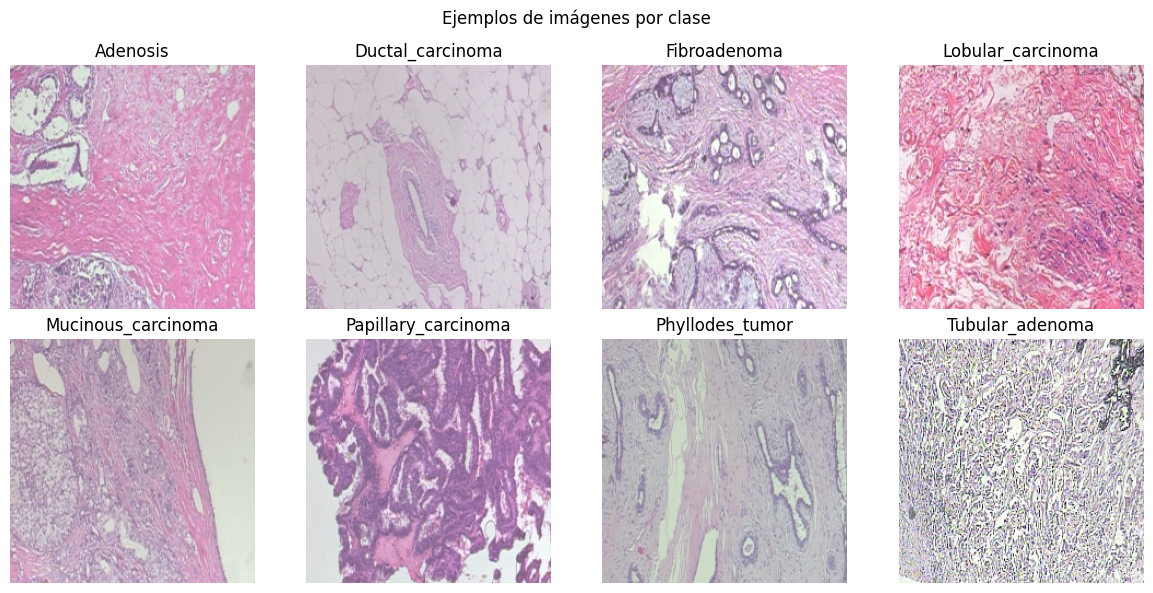

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Número de clases
num_class = len(class_map)
n_cols = 4
n_rows = (num_class + n_cols - 1) // n_cols  # filas para que no falle si no es divisible

plt.figure(figsize=(n_cols * 3, n_rows * 3))

# Recorrer cada clase por nombre
for idx, class_name in enumerate(class_map.keys()):
    class_path = None
    for group in os.listdir(base_path):
        group_path = os.path.join(base_path, group)
        potential_path = os.path.join(group_path, class_name)
        if os.path.isdir(potential_path):
            class_path = potential_path
            break

    if class_path is None:
        print(f"No se encontró carpeta para clase {class_name}")
        continue

    # Listar imágenes en esa carpeta
    images = [
        img for img in os.listdir(class_path)
        if img.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    if not images:
        print(f"No hay imágenes en: {class_path}")
        continue

    # Imagen aleatoria
    imagen_random = random.choice(images)
    imagen_path = os.path.join(class_path, imagen_random)
    print(imagen_path)
    imagen = Image.open(imagen_path)

    plt.subplot(n_rows, n_cols, idx + 1)
    plt.imshow(imagen)
    plt.title(class_name.capitalize())
    plt.axis('off')

plt.suptitle("Ejemplos de imágenes por clase")
plt.tight_layout()
plt.show()


## MODELOS CNN

In [4]:
import os
import random
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torchvision.transforms as transforms
import torch
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

# Detectar dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Usando dispositivo:", device)

# Codificar etiquetas
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
print(labels_encoded, len(labels_encoded))
# Separar en train/test (split con estratificación)
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    image_paths, labels_encoded, test_size=0.3, stratify=labels_encoded, random_state=42
)

# Definir transformaciones
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    # transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Cargar y transformar imágenes para train
train_images = []
for path in tqdm(train_image_paths):
    img = Image.open(path).convert("RGB")
    img = train_transform(img)
    train_images.append(img)

# Cargar y transformar imágenes para test
test_images = []
for path in tqdm(test_image_paths):
    img = Image.open(path).convert("RGB")
    img = test_transform(img)
    test_images.append(img)



Usando dispositivo: cpu
[7 7 7 ... 5 5 5] 3200


100%|██████████| 960/960 [04:16<00:00,  3.74it/s]


In [5]:
# Convertir listas a tensores
X_train_tensor = torch.stack(train_images)
y_train_tensor = torch.tensor(train_labels, dtype=torch.long)

X_test_tensor = torch.stack(test_images)
y_test_tensor = torch.tensor(test_labels, dtype=torch.long)

# Crear datasets y dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader_16 = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader_16 = DataLoader(test_dataset, batch_size=16, shuffle=False)

train_loader_32 = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader_32 = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
print(X_train_tensor.shape)  # Ejemplo: torch.Size([N, 3, 224, 224]) donde N es número de imágenes
print(y_train_tensor.shape)  # Ejemplo: torch.Size([N])
print(X_test_tensor.shape)  # Ejemplo: torch.Size([N, 3, 224, 224]) donde N es número de imágenes
print(y_test_tensor.shape)  # Ejemplo: torch.Size([N])

print('-----------------------------')

for images, labels in train_loader_16:
    print(images.shape)  # torch.Size([batch_size, 3, 224, 224])
    print(labels.shape)  # torch.Size([batch_size])
    break
for images, labels in train_loader_32:
    print(images.shape)  # torch.Size([batch_size, 3, 224, 224])
    print(labels.shape)  # torch.Size([batch_size])
    break

torch.Size([1120, 3, 224, 224])
torch.Size([1120])
torch.Size([480, 3, 224, 224])
torch.Size([480])
-----------------------------
torch.Size([16, 3, 224, 224])
torch.Size([16])
torch.Size([32, 3, 224, 224])
torch.Size([32])


## PRUEBAS DE LOS HIPERPARÁMETROS PARA CADA TIPO DE MODELO CNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50, ResNet50_Weights
from torch.utils.data import Subset, DataLoader
import itertools
from tqdm import tqdm
import random

# Espacio de hiperparámetros
param_grid = {
    'lr': [1e-4, 5e-05],
    'batch_size': [16, 32],
    'weight_decay': [0, 0.0001, 0.0005, 0.001]
}

# Crear combinaciones
keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Subconjunto del dataset para búsqueda rápida
subset_size = 200
train_subset = Subset(train_dataset, random.sample(range(len(train_dataset)), subset_size))
test_subset = Subset(test_dataset, random.sample(range(len(test_dataset)), subset_size))

# Función de pérdida
criterion = nn.CrossEntropyLoss()

# Entrenar y evaluar con cada combinación
for i, params in enumerate(param_combinations):
    print(f"\nProbando combinación {i+1}/{len(param_combinations)} ==> {params}")

    # Cargar modelo ResNet50 con pesos preentrenados
    model = resnet50(weights=ResNet50_Weights.DEFAULT)

    # Reemplazar la capa fully connected (fc)
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    # --- Enfoque: solo entrenar la última capa ---
    for param in model.parameters():
        param.requires_grad = False  # congelar todo

    # Solo entrenar esta capa
    for param in model.fc.parameters():
        param.requires_grad = True
    # -----------------------------------------------
    model = model.to(device)

    # Optimizer
    optimizer = optim.Adam(
        model.parameters(),
        lr=params['lr'],
        weight_decay=params['weight_decay']
    )

    # Loaders
    train_loader = DataLoader(train_subset, batch_size=params['batch_size'], shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=params['batch_size'])

    best_accuracy = 0
    total_loss = 0

    # Entrenamiento de 5 epochs
    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Entrenando (epoch {epoch+1})"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Evaluación por epoch
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        acc = correct / total
        avg_loss = running_loss / len(train_loader)
        print(f" Epoch {epoch+1} - Accuracy DenseNet: {acc:.4f} | Loss DenseNet: {avg_loss:.4f}")

        # Guardar mejor accuracy y loss para esta combinación
        if acc > best_accuracy:
            best_accuracy = acc
            total_loss = avg_loss

    print(f"Resultado final para combinación {i+1}: Accuracy DenseNet = {best_accuracy:.4f} | Loss DenseNet = {total_loss:.4f}")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import densenet121, DenseNet121_Weights
from torch.utils.data import Subset, DataLoader
import itertools
from tqdm import tqdm
import random

# Espacio de hiperparámetros
param_grid = {
    'lr': [1e-4, 5e-05],
    'batch_size': [16, 32],
    'weight_decay': [0, 0.0001, 0.0005, 0.001]
}

# Crear combinaciones
keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Subconjunto del dataset para búsqueda rápida
subset_size = 200
train_subset = Subset(train_dataset, random.sample(range(len(train_dataset)), subset_size))
test_subset = Subset(test_dataset, random.sample(range(len(test_dataset)), subset_size))

# Función de pérdida
criterion = nn.CrossEntropyLoss()

# Entrenar y evaluar con cada combinación
for i, params in enumerate(param_combinations):
    print(f"\nProbando combinación {i+1}/{len(param_combinations)} ==> {params}")

    # Modelo DenseNet con pesos preentrenados
    model = densenet121(weights=DenseNet121_Weights.DEFAULT)
    model.classifier = nn.Linear(model.classifier.in_features, num_classes)

    # ---------- Fine-tuning total -------------
    for param in model.parameters():
        param.requires_grad = True
    # ------------------------------------------
    model = model.to(device)

    # Optimizer
    optimizer = optim.Adam(
        model.parameters(),
        lr=params['lr'],
        weight_decay=params['weight_decay']
    )

    # Loaders
    train_loader = DataLoader(train_subset, batch_size=params['batch_size'], shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=params['batch_size'])

    best_accuracy = 0
    total_loss = 0

    # Entrenamiento de 5 epochs
    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Entrenando (epoch {epoch+1})"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Evaluación por epoch
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        acc = correct / total
        avg_loss = running_loss / len(train_loader)
        print(f" Epoch {epoch+1} - Accuracy DenseNet: {acc:.4f} | Loss DenseNet: {avg_loss:.4f}")

        # Guardar mejor accuracy y loss para esta combinación
        if acc > best_accuracy:
            best_accuracy = acc
            total_loss = avg_loss

    print(f"Resultado final para combinación {i+1}: Accuracy DenseNet = {best_accuracy:.4f} | Loss DenseNet = {total_loss:.4f}")


8

Probando combinación 1/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 13/13 [01:27<00:00,  6.70s/it]


 Epoch 1 - Accuracy DenseNet: 0.2350 | Loss DenseNet: 2.0865


Entrenando (epoch 2): 100%|██████████| 13/13 [01:20<00:00,  6.16s/it]


 Epoch 2 - Accuracy DenseNet: 0.3400 | Loss DenseNet: 1.3496


Entrenando (epoch 3): 100%|██████████| 13/13 [01:27<00:00,  6.71s/it]


 Epoch 3 - Accuracy DenseNet: 0.4500 | Loss DenseNet: 0.9209


Entrenando (epoch 4): 100%|██████████| 13/13 [01:40<00:00,  7.75s/it]


 Epoch 4 - Accuracy DenseNet: 0.4450 | Loss DenseNet: 0.6120


Entrenando (epoch 5): 100%|██████████| 13/13 [01:25<00:00,  6.57s/it]


 Epoch 5 - Accuracy DenseNet: 0.4400 | Loss DenseNet: 0.3751
Resultado final para combinación 1: Accuracy DenseNet = 0.4500 | Loss DenseNet = 0.9209

Probando combinación 2/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 13/13 [01:23<00:00,  6.41s/it]


 Epoch 1 - Accuracy DenseNet: 0.2600 | Loss DenseNet: 2.1801


Entrenando (epoch 2): 100%|██████████| 13/13 [01:20<00:00,  6.20s/it]


 Epoch 2 - Accuracy DenseNet: 0.3700 | Loss DenseNet: 1.2978


Entrenando (epoch 3): 100%|██████████| 13/13 [01:20<00:00,  6.18s/it]


 Epoch 3 - Accuracy DenseNet: 0.3700 | Loss DenseNet: 0.8186


Entrenando (epoch 4): 100%|██████████| 13/13 [01:22<00:00,  6.38s/it]


 Epoch 4 - Accuracy DenseNet: 0.4150 | Loss DenseNet: 0.5138


Entrenando (epoch 5): 100%|██████████| 13/13 [01:22<00:00,  6.32s/it]


 Epoch 5 - Accuracy DenseNet: 0.4650 | Loss DenseNet: 0.3655
Resultado final para combinación 2: Accuracy DenseNet = 0.4650 | Loss DenseNet = 0.3655

Probando combinación 3/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 13/13 [01:27<00:00,  6.76s/it]


 Epoch 1 - Accuracy DenseNet: 0.2300 | Loss DenseNet: 2.0896


Entrenando (epoch 2): 100%|██████████| 13/13 [01:24<00:00,  6.52s/it]


 Epoch 2 - Accuracy DenseNet: 0.3650 | Loss DenseNet: 1.2954


Entrenando (epoch 3): 100%|██████████| 13/13 [01:21<00:00,  6.23s/it]


 Epoch 3 - Accuracy DenseNet: 0.4200 | Loss DenseNet: 0.8316


Entrenando (epoch 4): 100%|██████████| 13/13 [01:27<00:00,  6.70s/it]


 Epoch 4 - Accuracy DenseNet: 0.4450 | Loss DenseNet: 0.5979


Entrenando (epoch 5): 100%|██████████| 13/13 [01:21<00:00,  6.31s/it]


 Epoch 5 - Accuracy DenseNet: 0.4500 | Loss DenseNet: 0.3764
Resultado final para combinación 3: Accuracy DenseNet = 0.4500 | Loss DenseNet = 0.3764

Probando combinación 4/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 13/13 [01:19<00:00,  6.11s/it]


 Epoch 1 - Accuracy DenseNet: 0.2500 | Loss DenseNet: 2.0266


Entrenando (epoch 2): 100%|██████████| 13/13 [01:24<00:00,  6.47s/it]


 Epoch 2 - Accuracy DenseNet: 0.3250 | Loss DenseNet: 1.2303


Entrenando (epoch 3): 100%|██████████| 13/13 [01:20<00:00,  6.18s/it]


 Epoch 3 - Accuracy DenseNet: 0.4200 | Loss DenseNet: 0.8172


Entrenando (epoch 4): 100%|██████████| 13/13 [01:20<00:00,  6.19s/it]


 Epoch 4 - Accuracy DenseNet: 0.4350 | Loss DenseNet: 0.5206


Entrenando (epoch 5): 100%|██████████| 13/13 [01:22<00:00,  6.31s/it]


 Epoch 5 - Accuracy DenseNet: 0.4650 | Loss DenseNet: 0.3764
Resultado final para combinación 4: Accuracy DenseNet = 0.4650 | Loss DenseNet = 0.3764

Probando combinación 5/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:39<00:00, 14.17s/it]


 Epoch 1 - Accuracy DenseNet: 0.1550 | Loss DenseNet: 2.1902


Entrenando (epoch 2): 100%|██████████| 7/7 [01:34<00:00, 13.56s/it]


 Epoch 2 - Accuracy DenseNet: 0.2850 | Loss DenseNet: 1.3383


Entrenando (epoch 3): 100%|██████████| 7/7 [01:30<00:00, 12.92s/it]


 Epoch 3 - Accuracy DenseNet: 0.3650 | Loss DenseNet: 0.9735


Entrenando (epoch 4): 100%|██████████| 7/7 [01:31<00:00, 13.03s/it]


 Epoch 4 - Accuracy DenseNet: 0.4150 | Loss DenseNet: 0.6954


Entrenando (epoch 5): 100%|██████████| 7/7 [01:35<00:00, 13.64s/it]


 Epoch 5 - Accuracy DenseNet: 0.4450 | Loss DenseNet: 0.4948
Resultado final para combinación 5: Accuracy DenseNet = 0.4450 | Loss DenseNet = 0.4948

Probando combinación 6/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:35<00:00, 13.69s/it]


 Epoch 1 - Accuracy DenseNet: 0.2100 | Loss DenseNet: 2.0973


Entrenando (epoch 2): 100%|██████████| 7/7 [01:38<00:00, 14.05s/it]


 Epoch 2 - Accuracy DenseNet: 0.2950 | Loss DenseNet: 1.3152


Entrenando (epoch 3): 100%|██████████| 7/7 [01:35<00:00, 13.63s/it]


 Epoch 3 - Accuracy DenseNet: 0.3550 | Loss DenseNet: 0.9022


Entrenando (epoch 4): 100%|██████████| 7/7 [01:33<00:00, 13.37s/it]


 Epoch 4 - Accuracy DenseNet: 0.3950 | Loss DenseNet: 0.6646


Entrenando (epoch 5): 100%|██████████| 7/7 [01:36<00:00, 13.77s/it]


 Epoch 5 - Accuracy DenseNet: 0.4050 | Loss DenseNet: 0.4677
Resultado final para combinación 6: Accuracy DenseNet = 0.4050 | Loss DenseNet = 0.4677

Probando combinación 7/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:34<00:00, 13.51s/it]


 Epoch 1 - Accuracy DenseNet: 0.2050 | Loss DenseNet: 2.0603


Entrenando (epoch 2): 100%|██████████| 7/7 [01:34<00:00, 13.54s/it]


 Epoch 2 - Accuracy DenseNet: 0.3000 | Loss DenseNet: 1.2936


Entrenando (epoch 3): 100%|██████████| 7/7 [01:35<00:00, 13.71s/it]


 Epoch 3 - Accuracy DenseNet: 0.3750 | Loss DenseNet: 0.8610


Entrenando (epoch 4): 100%|██████████| 7/7 [01:34<00:00, 13.48s/it]


 Epoch 4 - Accuracy DenseNet: 0.4350 | Loss DenseNet: 0.5790


Entrenando (epoch 5): 100%|██████████| 7/7 [01:33<00:00, 13.29s/it]


 Epoch 5 - Accuracy DenseNet: 0.4750 | Loss DenseNet: 0.4185
Resultado final para combinación 7: Accuracy DenseNet = 0.4750 | Loss DenseNet = 0.4185

Probando combinación 8/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:32<00:00, 13.17s/it]


 Epoch 1 - Accuracy DenseNet: 0.1750 | Loss DenseNet: 2.0591


Entrenando (epoch 2): 100%|██████████| 7/7 [01:31<00:00, 13.05s/it]


 Epoch 2 - Accuracy DenseNet: 0.4150 | Loss DenseNet: 1.2989


Entrenando (epoch 3): 100%|██████████| 7/7 [01:30<00:00, 12.92s/it]


 Epoch 3 - Accuracy DenseNet: 0.3950 | Loss DenseNet: 0.9427


Entrenando (epoch 4): 100%|██████████| 7/7 [01:33<00:00, 13.33s/it]


 Epoch 4 - Accuracy DenseNet: 0.4250 | Loss DenseNet: 0.6350


Entrenando (epoch 5): 100%|██████████| 7/7 [01:35<00:00, 13.61s/it]


 Epoch 5 - Accuracy DenseNet: 0.4250 | Loss DenseNet: 0.4708
Resultado final para combinación 8: Accuracy DenseNet = 0.4250 | Loss DenseNet = 0.6350

Probando combinación 9/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 13/13 [01:19<00:00,  6.15s/it]


 Epoch 1 - Accuracy DenseNet: 0.1700 | Loss DenseNet: 2.1700


Entrenando (epoch 2): 100%|██████████| 13/13 [01:21<00:00,  6.24s/it]


 Epoch 2 - Accuracy DenseNet: 0.2100 | Loss DenseNet: 1.6300


Entrenando (epoch 3): 100%|██████████| 13/13 [01:26<00:00,  6.65s/it]


 Epoch 3 - Accuracy DenseNet: 0.3150 | Loss DenseNet: 1.2951


Entrenando (epoch 4): 100%|██████████| 13/13 [01:21<00:00,  6.28s/it]


 Epoch 4 - Accuracy DenseNet: 0.3450 | Loss DenseNet: 1.0076


Entrenando (epoch 5): 100%|██████████| 13/13 [01:19<00:00,  6.11s/it]


 Epoch 5 - Accuracy DenseNet: 0.4100 | Loss DenseNet: 0.8009
Resultado final para combinación 9: Accuracy DenseNet = 0.4100 | Loss DenseNet = 0.8009

Probando combinación 10/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 13/13 [01:24<00:00,  6.50s/it]


 Epoch 1 - Accuracy DenseNet: 0.2250 | Loss DenseNet: 2.1166


Entrenando (epoch 2): 100%|██████████| 13/13 [01:22<00:00,  6.34s/it]


 Epoch 2 - Accuracy DenseNet: 0.2950 | Loss DenseNet: 1.5990


Entrenando (epoch 3): 100%|██████████| 13/13 [01:22<00:00,  6.37s/it]


 Epoch 3 - Accuracy DenseNet: 0.3550 | Loss DenseNet: 1.2575


Entrenando (epoch 4): 100%|██████████| 13/13 [01:22<00:00,  6.32s/it]


 Epoch 4 - Accuracy DenseNet: 0.3900 | Loss DenseNet: 0.9762


Entrenando (epoch 5): 100%|██████████| 13/13 [01:20<00:00,  6.17s/it]


 Epoch 5 - Accuracy DenseNet: 0.3950 | Loss DenseNet: 0.8155
Resultado final para combinación 10: Accuracy DenseNet = 0.3950 | Loss DenseNet = 0.8155

Probando combinación 11/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 13/13 [01:22<00:00,  6.33s/it]


 Epoch 1 - Accuracy DenseNet: 0.1750 | Loss DenseNet: 2.1170


Entrenando (epoch 2): 100%|██████████| 13/13 [01:19<00:00,  6.14s/it]


 Epoch 2 - Accuracy DenseNet: 0.3050 | Loss DenseNet: 1.5952


Entrenando (epoch 3): 100%|██████████| 13/13 [01:19<00:00,  6.15s/it]


 Epoch 3 - Accuracy DenseNet: 0.3450 | Loss DenseNet: 1.2601


Entrenando (epoch 4): 100%|██████████| 13/13 [01:23<00:00,  6.42s/it]


 Epoch 4 - Accuracy DenseNet: 0.3750 | Loss DenseNet: 0.9679


Entrenando (epoch 5): 100%|██████████| 13/13 [01:18<00:00,  6.05s/it]


 Epoch 5 - Accuracy DenseNet: 0.3900 | Loss DenseNet: 0.7846
Resultado final para combinación 11: Accuracy DenseNet = 0.3900 | Loss DenseNet = 0.7846

Probando combinación 12/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 13/13 [01:18<00:00,  6.08s/it]


 Epoch 1 - Accuracy DenseNet: 0.1750 | Loss DenseNet: 2.0385


Entrenando (epoch 2): 100%|██████████| 13/13 [01:18<00:00,  6.06s/it]


 Epoch 2 - Accuracy DenseNet: 0.3350 | Loss DenseNet: 1.5462


Entrenando (epoch 3): 100%|██████████| 13/13 [01:19<00:00,  6.11s/it]


 Epoch 3 - Accuracy DenseNet: 0.3950 | Loss DenseNet: 1.2043


Entrenando (epoch 4): 100%|██████████| 13/13 [01:16<00:00,  5.85s/it]


 Epoch 4 - Accuracy DenseNet: 0.4200 | Loss DenseNet: 0.9464


Entrenando (epoch 5): 100%|██████████| 13/13 [01:18<00:00,  6.04s/it]


 Epoch 5 - Accuracy DenseNet: 0.4750 | Loss DenseNet: 0.7385
Resultado final para combinación 12: Accuracy DenseNet = 0.4750 | Loss DenseNet = 0.7385

Probando combinación 13/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:35<00:00, 13.57s/it]


 Epoch 1 - Accuracy DenseNet: 0.2050 | Loss DenseNet: 2.1170


Entrenando (epoch 2): 100%|██████████| 7/7 [01:30<00:00, 12.87s/it]


 Epoch 2 - Accuracy DenseNet: 0.2350 | Loss DenseNet: 1.6331


Entrenando (epoch 3): 100%|██████████| 7/7 [01:28<00:00, 12.66s/it]


 Epoch 3 - Accuracy DenseNet: 0.2800 | Loss DenseNet: 1.3011


Entrenando (epoch 4): 100%|██████████| 7/7 [01:30<00:00, 12.94s/it]


 Epoch 4 - Accuracy DenseNet: 0.3200 | Loss DenseNet: 1.0705


Entrenando (epoch 5): 100%|██████████| 7/7 [01:30<00:00, 12.91s/it]


 Epoch 5 - Accuracy DenseNet: 0.3600 | Loss DenseNet: 0.8630
Resultado final para combinación 13: Accuracy DenseNet = 0.3600 | Loss DenseNet = 0.8630

Probando combinación 14/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:29<00:00, 12.72s/it]


 Epoch 1 - Accuracy DenseNet: 0.1050 | Loss DenseNet: 2.0893


Entrenando (epoch 2): 100%|██████████| 7/7 [01:29<00:00, 12.80s/it]


 Epoch 2 - Accuracy DenseNet: 0.2450 | Loss DenseNet: 1.6001


Entrenando (epoch 3): 100%|██████████| 7/7 [01:29<00:00, 12.81s/it]


 Epoch 3 - Accuracy DenseNet: 0.2800 | Loss DenseNet: 1.2848


Entrenando (epoch 4): 100%|██████████| 7/7 [01:30<00:00, 12.99s/it]


 Epoch 4 - Accuracy DenseNet: 0.3650 | Loss DenseNet: 1.0772


Entrenando (epoch 5): 100%|██████████| 7/7 [01:34<00:00, 13.56s/it]


 Epoch 5 - Accuracy DenseNet: 0.3700 | Loss DenseNet: 0.8952
Resultado final para combinación 14: Accuracy DenseNet = 0.3700 | Loss DenseNet = 0.8952

Probando combinación 15/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:32<00:00, 13.22s/it]


 Epoch 1 - Accuracy DenseNet: 0.2100 | Loss DenseNet: 2.1254


Entrenando (epoch 2): 100%|██████████| 7/7 [01:35<00:00, 13.63s/it]


 Epoch 2 - Accuracy DenseNet: 0.2650 | Loss DenseNet: 1.6108


Entrenando (epoch 3): 100%|██████████| 7/7 [01:35<00:00, 13.62s/it]


 Epoch 3 - Accuracy DenseNet: 0.3050 | Loss DenseNet: 1.3393


Entrenando (epoch 4): 100%|██████████| 7/7 [01:35<00:00, 13.65s/it]


 Epoch 4 - Accuracy DenseNet: 0.3500 | Loss DenseNet: 1.0533


Entrenando (epoch 5): 100%|██████████| 7/7 [01:34<00:00, 13.56s/it]


 Epoch 5 - Accuracy DenseNet: 0.3750 | Loss DenseNet: 0.8888
Resultado final para combinación 15: Accuracy DenseNet = 0.3750 | Loss DenseNet = 0.8888

Probando combinación 16/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:31<00:00, 13.14s/it]


 Epoch 1 - Accuracy DenseNet: 0.1550 | Loss DenseNet: 2.1493


Entrenando (epoch 2): 100%|██████████| 7/7 [01:32<00:00, 13.24s/it]


 Epoch 2 - Accuracy DenseNet: 0.2300 | Loss DenseNet: 1.6468


Entrenando (epoch 3): 100%|██████████| 7/7 [01:35<00:00, 13.61s/it]


 Epoch 3 - Accuracy DenseNet: 0.2700 | Loss DenseNet: 1.3810


Entrenando (epoch 4): 100%|██████████| 7/7 [01:33<00:00, 13.36s/it]


 Epoch 4 - Accuracy DenseNet: 0.3250 | Loss DenseNet: 1.1224


Entrenando (epoch 5): 100%|██████████| 7/7 [01:35<00:00, 13.66s/it]


 Epoch 5 - Accuracy DenseNet: 0.3400 | Loss DenseNet: 0.9049
Resultado final para combinación 16: Accuracy DenseNet = 0.3400 | Loss DenseNet = 0.9049


Probando combinación 32/60: {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.001}
Accuracy AlexNet: 0.3775 | Loss AlexNet: 1.9877

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import alexnet, AlexNet_Weights
from torch.utils.data import Subset, DataLoader
import itertools
from tqdm import tqdm
import random

# Espacio de hiperparámetros
param_grid = {
    'lr': [1e-4, 5e-05],
    'batch_size': [16, 32],
    'weight_decay': [0, 0.0001, 0.0005, 0.001]
}

# Crear combinaciones
keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Subconjunto del dataset para búsqueda rápida
subset_size = 200
train_subset = Subset(train_dataset, random.sample(range(len(train_dataset)), subset_size))
test_subset = Subset(test_dataset, random.sample(range(len(test_dataset)), subset_size))

# Función de pérdida
criterion = nn.CrossEntropyLoss()

# Entrenar y evaluar con cada combinación
for i, params in enumerate(param_combinations):
    print(f"\nProbando combinación {i+1}/{len(param_combinations)} ==> {params}")

    # Modelo AlexNet con pesos preentrenados
    model = alexnet(weights=AlexNet_Weights.DEFAULT)
    model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    model = model.to(device)

    # Optimizer
    optimizer = optim.Adam(
        model.parameters(),
        lr=params['lr'],
        weight_decay=params['weight_decay']
    )

    # Loaders
    train_loader = DataLoader(train_subset, batch_size=params['batch_size'], shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=params['batch_size'])

    best_accuracy = 0
    total_loss = 0

    # Entrenamiento de 5 epochs
    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Entrenando (epoch {epoch+1})"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Evaluación por epoch
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        acc = correct / total
        avg_loss = running_loss / len(train_loader)
        print(f" Epoch {epoch+1} - Accuracy AlexNet: {acc:.4f} | Loss AlexNet: {avg_loss:.4f}")

        # Guardar mejor accuracy y loss para esta combinación
        if acc > best_accuracy:
            best_accuracy = acc
            total_loss = avg_loss

    print(f"Resultado final para combinación {i+1}: Accuracy AlexNet = {best_accuracy:.4f} | Loss AlexNet = {total_loss:.4f}")


8

Probando combinación 1/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:22<00:00,  1.72s/it]


 Epoch 1 - Accuracy AlexNet: 0.1650 | Loss AlexNet: 2.1106


Entrenando (epoch 2): 100%|██████████| 13/13 [00:21<00:00,  1.67s/it]


 Epoch 2 - Accuracy AlexNet: 0.2500 | Loss AlexNet: 1.7873


Entrenando (epoch 3): 100%|██████████| 13/13 [00:21<00:00,  1.62s/it]


 Epoch 3 - Accuracy AlexNet: 0.3400 | Loss AlexNet: 1.4779


Entrenando (epoch 4): 100%|██████████| 13/13 [00:20<00:00,  1.59s/it]


 Epoch 4 - Accuracy AlexNet: 0.3600 | Loss AlexNet: 1.0761


Entrenando (epoch 5): 100%|██████████| 13/13 [00:19<00:00,  1.53s/it]


 Epoch 5 - Accuracy AlexNet: 0.3200 | Loss AlexNet: 0.8306
Resultado final para combinación 1: Accuracy AlexNet = 0.3600 | Loss AlexNet = 1.0761

Probando combinación 2/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:20<00:00,  1.58s/it]


 Epoch 1 - Accuracy AlexNet: 0.1550 | Loss AlexNet: 2.1535


Entrenando (epoch 2): 100%|██████████| 13/13 [00:20<00:00,  1.60s/it]


 Epoch 2 - Accuracy AlexNet: 0.2100 | Loss AlexNet: 1.7977


Entrenando (epoch 3): 100%|██████████| 13/13 [00:21<00:00,  1.62s/it]


 Epoch 3 - Accuracy AlexNet: 0.2450 | Loss AlexNet: 1.3775


Entrenando (epoch 4): 100%|██████████| 13/13 [00:20<00:00,  1.57s/it]


 Epoch 4 - Accuracy AlexNet: 0.2750 | Loss AlexNet: 1.0582


Entrenando (epoch 5): 100%|██████████| 13/13 [00:20<00:00,  1.59s/it]


 Epoch 5 - Accuracy AlexNet: 0.3100 | Loss AlexNet: 0.6081
Resultado final para combinación 2: Accuracy AlexNet = 0.3100 | Loss AlexNet = 0.6081

Probando combinación 3/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:20<00:00,  1.59s/it]


 Epoch 1 - Accuracy AlexNet: 0.1400 | Loss AlexNet: 2.0659


Entrenando (epoch 2): 100%|██████████| 13/13 [00:20<00:00,  1.56s/it]


 Epoch 2 - Accuracy AlexNet: 0.1950 | Loss AlexNet: 1.7588


Entrenando (epoch 3): 100%|██████████| 13/13 [00:20<00:00,  1.57s/it]


 Epoch 3 - Accuracy AlexNet: 0.1800 | Loss AlexNet: 1.3138


Entrenando (epoch 4): 100%|██████████| 13/13 [00:20<00:00,  1.58s/it]


 Epoch 4 - Accuracy AlexNet: 0.3350 | Loss AlexNet: 0.8874


Entrenando (epoch 5): 100%|██████████| 13/13 [00:21<00:00,  1.63s/it]


 Epoch 5 - Accuracy AlexNet: 0.3350 | Loss AlexNet: 0.5209
Resultado final para combinación 3: Accuracy AlexNet = 0.3350 | Loss AlexNet = 0.8874

Probando combinación 4/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:22<00:00,  1.72s/it]


 Epoch 1 - Accuracy AlexNet: 0.1800 | Loss AlexNet: 2.0926


Entrenando (epoch 2): 100%|██████████| 13/13 [00:22<00:00,  1.70s/it]


 Epoch 2 - Accuracy AlexNet: 0.2050 | Loss AlexNet: 1.6706


Entrenando (epoch 3): 100%|██████████| 13/13 [00:20<00:00,  1.60s/it]


 Epoch 3 - Accuracy AlexNet: 0.3750 | Loss AlexNet: 1.2747


Entrenando (epoch 4): 100%|██████████| 13/13 [00:20<00:00,  1.55s/it]


 Epoch 4 - Accuracy AlexNet: 0.3050 | Loss AlexNet: 0.9190


Entrenando (epoch 5): 100%|██████████| 13/13 [00:21<00:00,  1.64s/it]


 Epoch 5 - Accuracy AlexNet: 0.3400 | Loss AlexNet: 0.6408
Resultado final para combinación 4: Accuracy AlexNet = 0.3750 | Loss AlexNet = 1.2747

Probando combinación 5/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:16<00:00,  2.36s/it]


 Epoch 1 - Accuracy AlexNet: 0.1750 | Loss AlexNet: 2.0748


Entrenando (epoch 2): 100%|██████████| 7/7 [00:16<00:00,  2.39s/it]


 Epoch 2 - Accuracy AlexNet: 0.2050 | Loss AlexNet: 1.7675


Entrenando (epoch 3): 100%|██████████| 7/7 [00:16<00:00,  2.37s/it]


 Epoch 3 - Accuracy AlexNet: 0.3050 | Loss AlexNet: 1.3951


Entrenando (epoch 4): 100%|██████████| 7/7 [00:15<00:00,  2.28s/it]


 Epoch 4 - Accuracy AlexNet: 0.2200 | Loss AlexNet: 1.1414


Entrenando (epoch 5): 100%|██████████| 7/7 [00:16<00:00,  2.33s/it]


 Epoch 5 - Accuracy AlexNet: 0.3750 | Loss AlexNet: 0.8264
Resultado final para combinación 5: Accuracy AlexNet = 0.3750 | Loss AlexNet = 0.8264

Probando combinación 6/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:17<00:00,  2.53s/it]


 Epoch 1 - Accuracy AlexNet: 0.2250 | Loss AlexNet: 2.1003


Entrenando (epoch 2): 100%|██████████| 7/7 [00:17<00:00,  2.46s/it]


 Epoch 2 - Accuracy AlexNet: 0.2150 | Loss AlexNet: 1.7471


Entrenando (epoch 3): 100%|██████████| 7/7 [00:16<00:00,  2.37s/it]


 Epoch 3 - Accuracy AlexNet: 0.3350 | Loss AlexNet: 1.4197


Entrenando (epoch 4): 100%|██████████| 7/7 [00:16<00:00,  2.41s/it]


 Epoch 4 - Accuracy AlexNet: 0.3050 | Loss AlexNet: 1.0163


Entrenando (epoch 5): 100%|██████████| 7/7 [00:16<00:00,  2.33s/it]


 Epoch 5 - Accuracy AlexNet: 0.3350 | Loss AlexNet: 0.8288
Resultado final para combinación 6: Accuracy AlexNet = 0.3350 | Loss AlexNet = 1.4197

Probando combinación 7/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:16<00:00,  2.35s/it]


 Epoch 1 - Accuracy AlexNet: 0.1900 | Loss AlexNet: 2.0717


Entrenando (epoch 2): 100%|██████████| 7/7 [00:17<00:00,  2.43s/it]


 Epoch 2 - Accuracy AlexNet: 0.1400 | Loss AlexNet: 1.8110


Entrenando (epoch 3): 100%|██████████| 7/7 [00:16<00:00,  2.38s/it]


 Epoch 3 - Accuracy AlexNet: 0.3250 | Loss AlexNet: 1.4655


Entrenando (epoch 4): 100%|██████████| 7/7 [00:16<00:00,  2.33s/it]


 Epoch 4 - Accuracy AlexNet: 0.3000 | Loss AlexNet: 1.1748


Entrenando (epoch 5): 100%|██████████| 7/7 [00:16<00:00,  2.33s/it]


 Epoch 5 - Accuracy AlexNet: 0.2250 | Loss AlexNet: 0.8944
Resultado final para combinación 7: Accuracy AlexNet = 0.3250 | Loss AlexNet = 1.4655

Probando combinación 8/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:16<00:00,  2.41s/it]


 Epoch 1 - Accuracy AlexNet: 0.1400 | Loss AlexNet: 2.0873


Entrenando (epoch 2): 100%|██████████| 7/7 [00:17<00:00,  2.44s/it]


 Epoch 2 - Accuracy AlexNet: 0.2600 | Loss AlexNet: 1.7936


Entrenando (epoch 3): 100%|██████████| 7/7 [00:16<00:00,  2.35s/it]


 Epoch 3 - Accuracy AlexNet: 0.3150 | Loss AlexNet: 1.3941


Entrenando (epoch 4): 100%|██████████| 7/7 [00:16<00:00,  2.37s/it]


 Epoch 4 - Accuracy AlexNet: 0.2850 | Loss AlexNet: 1.0361


Entrenando (epoch 5): 100%|██████████| 7/7 [00:16<00:00,  2.37s/it]


 Epoch 5 - Accuracy AlexNet: 0.3400 | Loss AlexNet: 0.7174
Resultado final para combinación 8: Accuracy AlexNet = 0.3400 | Loss AlexNet = 0.7174

Probando combinación 9/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:20<00:00,  1.59s/it]


 Epoch 1 - Accuracy AlexNet: 0.1100 | Loss AlexNet: 2.1428


Entrenando (epoch 2): 100%|██████████| 13/13 [00:19<00:00,  1.53s/it]


 Epoch 2 - Accuracy AlexNet: 0.1100 | Loss AlexNet: 1.8570


Entrenando (epoch 3): 100%|██████████| 13/13 [00:20<00:00,  1.58s/it]


 Epoch 3 - Accuracy AlexNet: 0.2300 | Loss AlexNet: 1.5653


Entrenando (epoch 4): 100%|██████████| 13/13 [00:20<00:00,  1.54s/it]


 Epoch 4 - Accuracy AlexNet: 0.2650 | Loss AlexNet: 1.2373


Entrenando (epoch 5): 100%|██████████| 13/13 [00:19<00:00,  1.53s/it]


 Epoch 5 - Accuracy AlexNet: 0.2800 | Loss AlexNet: 0.9260
Resultado final para combinación 9: Accuracy AlexNet = 0.2800 | Loss AlexNet = 0.9260

Probando combinación 10/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:21<00:00,  1.64s/it]


 Epoch 1 - Accuracy AlexNet: 0.1150 | Loss AlexNet: 2.1315


Entrenando (epoch 2): 100%|██████████| 13/13 [00:20<00:00,  1.55s/it]


 Epoch 2 - Accuracy AlexNet: 0.1200 | Loss AlexNet: 1.8473


Entrenando (epoch 3): 100%|██████████| 13/13 [00:20<00:00,  1.58s/it]


 Epoch 3 - Accuracy AlexNet: 0.1950 | Loss AlexNet: 1.5514


Entrenando (epoch 4): 100%|██████████| 13/13 [00:22<00:00,  1.70s/it]


 Epoch 4 - Accuracy AlexNet: 0.2750 | Loss AlexNet: 1.2186


Entrenando (epoch 5): 100%|██████████| 13/13 [00:21<00:00,  1.63s/it]


 Epoch 5 - Accuracy AlexNet: 0.1800 | Loss AlexNet: 0.8634
Resultado final para combinación 10: Accuracy AlexNet = 0.2750 | Loss AlexNet = 1.2186

Probando combinación 11/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:21<00:00,  1.63s/it]


 Epoch 1 - Accuracy AlexNet: 0.1400 | Loss AlexNet: 2.1143


Entrenando (epoch 2): 100%|██████████| 13/13 [00:20<00:00,  1.57s/it]


 Epoch 2 - Accuracy AlexNet: 0.1500 | Loss AlexNet: 1.7908


Entrenando (epoch 3): 100%|██████████| 13/13 [00:21<00:00,  1.62s/it]


 Epoch 3 - Accuracy AlexNet: 0.1700 | Loss AlexNet: 1.5968


Entrenando (epoch 4): 100%|██████████| 13/13 [00:21<00:00,  1.64s/it]


 Epoch 4 - Accuracy AlexNet: 0.2650 | Loss AlexNet: 1.2411


Entrenando (epoch 5): 100%|██████████| 13/13 [00:21<00:00,  1.64s/it]


 Epoch 5 - Accuracy AlexNet: 0.3700 | Loss AlexNet: 0.9453
Resultado final para combinación 11: Accuracy AlexNet = 0.3700 | Loss AlexNet = 0.9453

Probando combinación 12/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:20<00:00,  1.60s/it]


 Epoch 1 - Accuracy AlexNet: 0.1650 | Loss AlexNet: 2.1111


Entrenando (epoch 2): 100%|██████████| 13/13 [00:21<00:00,  1.62s/it]


 Epoch 2 - Accuracy AlexNet: 0.2100 | Loss AlexNet: 1.7544


Entrenando (epoch 3): 100%|██████████| 13/13 [00:20<00:00,  1.60s/it]


 Epoch 3 - Accuracy AlexNet: 0.2200 | Loss AlexNet: 1.4537


Entrenando (epoch 4): 100%|██████████| 13/13 [00:20<00:00,  1.61s/it]


 Epoch 4 - Accuracy AlexNet: 0.3400 | Loss AlexNet: 1.0615


Entrenando (epoch 5): 100%|██████████| 13/13 [00:21<00:00,  1.64s/it]


 Epoch 5 - Accuracy AlexNet: 0.3950 | Loss AlexNet: 0.7262
Resultado final para combinación 12: Accuracy AlexNet = 0.3950 | Loss AlexNet = 0.7262

Probando combinación 13/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:17<00:00,  2.52s/it]


 Epoch 1 - Accuracy AlexNet: 0.1350 | Loss AlexNet: 2.0863


Entrenando (epoch 2): 100%|██████████| 7/7 [00:17<00:00,  2.49s/it]


 Epoch 2 - Accuracy AlexNet: 0.1550 | Loss AlexNet: 1.8027


Entrenando (epoch 3): 100%|██████████| 7/7 [00:16<00:00,  2.39s/it]


 Epoch 3 - Accuracy AlexNet: 0.2500 | Loss AlexNet: 1.6333


Entrenando (epoch 4): 100%|██████████| 7/7 [00:16<00:00,  2.39s/it]


 Epoch 4 - Accuracy AlexNet: 0.2600 | Loss AlexNet: 1.3833


Entrenando (epoch 5): 100%|██████████| 7/7 [00:16<00:00,  2.38s/it]


 Epoch 5 - Accuracy AlexNet: 0.2700 | Loss AlexNet: 1.1183
Resultado final para combinación 13: Accuracy AlexNet = 0.2700 | Loss AlexNet = 1.1183

Probando combinación 14/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:17<00:00,  2.43s/it]


 Epoch 1 - Accuracy AlexNet: 0.1400 | Loss AlexNet: 2.1111


Entrenando (epoch 2): 100%|██████████| 7/7 [00:17<00:00,  2.46s/it]


 Epoch 2 - Accuracy AlexNet: 0.2050 | Loss AlexNet: 1.8550


Entrenando (epoch 3): 100%|██████████| 7/7 [00:17<00:00,  2.46s/it]


 Epoch 3 - Accuracy AlexNet: 0.1900 | Loss AlexNet: 1.6411


Entrenando (epoch 4): 100%|██████████| 7/7 [00:16<00:00,  2.43s/it]


 Epoch 4 - Accuracy AlexNet: 0.2000 | Loss AlexNet: 1.4274


Entrenando (epoch 5): 100%|██████████| 7/7 [00:17<00:00,  2.45s/it]


 Epoch 5 - Accuracy AlexNet: 0.2500 | Loss AlexNet: 1.2623
Resultado final para combinación 14: Accuracy AlexNet = 0.2500 | Loss AlexNet = 1.2623

Probando combinación 15/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:16<00:00,  2.42s/it]


 Epoch 1 - Accuracy AlexNet: 0.1200 | Loss AlexNet: 2.1323


Entrenando (epoch 2): 100%|██████████| 7/7 [00:16<00:00,  2.33s/it]


 Epoch 2 - Accuracy AlexNet: 0.1300 | Loss AlexNet: 1.8479


Entrenando (epoch 3): 100%|██████████| 7/7 [00:16<00:00,  2.42s/it]


 Epoch 3 - Accuracy AlexNet: 0.2000 | Loss AlexNet: 1.6810


Entrenando (epoch 4): 100%|██████████| 7/7 [00:17<00:00,  2.54s/it]


 Epoch 4 - Accuracy AlexNet: 0.2850 | Loss AlexNet: 1.4770


Entrenando (epoch 5): 100%|██████████| 7/7 [00:17<00:00,  2.48s/it]


 Epoch 5 - Accuracy AlexNet: 0.3350 | Loss AlexNet: 1.1501
Resultado final para combinación 15: Accuracy AlexNet = 0.3350 | Loss AlexNet = 1.1501

Probando combinación 16/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:17<00:00,  2.44s/it]


 Epoch 1 - Accuracy AlexNet: 0.0950 | Loss AlexNet: 2.0867


Entrenando (epoch 2): 100%|██████████| 7/7 [00:16<00:00,  2.42s/it]


 Epoch 2 - Accuracy AlexNet: 0.1250 | Loss AlexNet: 1.7835


Entrenando (epoch 3): 100%|██████████| 7/7 [00:16<00:00,  2.42s/it]


 Epoch 3 - Accuracy AlexNet: 0.1450 | Loss AlexNet: 1.6513


Entrenando (epoch 4): 100%|██████████| 7/7 [00:16<00:00,  2.41s/it]


 Epoch 4 - Accuracy AlexNet: 0.1950 | Loss AlexNet: 1.4090


Entrenando (epoch 5): 100%|██████████| 7/7 [00:17<00:00,  2.48s/it]


 Epoch 5 - Accuracy AlexNet: 0.2350 | Loss AlexNet: 1.1617
Resultado final para combinación 16: Accuracy AlexNet = 0.2350 | Loss AlexNet = 1.1617


Probando combinación 1/24 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0}
Accuracy AlexNet: 0.4175 | LosslexNet: 1.9620

Probando combinación 2/24 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0001}
Accuracy AlexNet: 0.3775 | LosslexNet: 1.9441

Probando combinación 3/24 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0005}
Accuracy AlexNet: 0.3800 | LosslexNet: 1.9818

Probando combinación 4/24 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.001}
Accuracy AlexNet: 0.4100 | LosslexNet: 2.0264


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import googlenet, GoogLeNet_Weights
from torch.utils.data import Subset, DataLoader
import itertools
from tqdm import tqdm
import random

# Espacio de hiperparámetros
param_grid = {
    'lr': [1e-4, 5e-05],
    'batch_size': [16, 32],
    'weight_decay': [0, 0.0001, 0.0005, 0.001]
}

# Crear combinaciones
keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Subconjunto del dataset para búsqueda rápida
subset_size = 200
train_subset = Subset(train_dataset, random.sample(range(len(train_dataset)), subset_size))
test_subset = Subset(test_dataset, random.sample(range(len(test_dataset)), subset_size))

# Función de pérdida
criterion = nn.CrossEntropyLoss()

# Entrenar y evaluar con cada combinación
for i, params in enumerate(param_combinations):
    print(f"\nProbando combinación {i+1}/{len(param_combinations)} ==> {params}")

    # Modelo con pesos preentrenados
    model = googlenet(weights=GoogLeNet_Weights.DEFAULT)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    if model.aux_logits:
        model.aux1.fc2 = nn.Linear(model.aux1.fc2.in_features, num_classes)
        model.aux2.fc2 = nn.Linear(model.aux2.fc2.in_features, num_classes)
    model = model.to(device)

    # Optimizer
    optimizer = optim.Adam(
        model.parameters(),
        lr=params['lr'],
        weight_decay=params['weight_decay']
    )

    # Loaders
    train_loader = DataLoader(train_subset, batch_size=params['batch_size'], shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=params['batch_size'])

    best_accuracy = 0
    total_loss = 0

    # Entrenamiento de 5 epochs
    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Entrenando (epoch {epoch+1})"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Evaluación por epoch
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        acc = correct / total
        avg_loss = running_loss / len(train_loader)
        print(f" Epoch {epoch+1} - Accuracy GoogLeNet: {acc:.4f} | Loss GoogLeNet: {avg_loss:.4f}")

        # Guardar mejor accuracy y loss para esta combinación
        if acc > best_accuracy:
            best_accuracy = acc
            total_loss = avg_loss

    print(f"Resultado final para combinación {i+1}: Accuracy GoogLeNet = {best_accuracy:.4f} | Loss GoogLeNet = {total_loss:.4f}")


8

Probando combinación 1/8 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0001}


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 118MB/s]
Entrenando (epoch 1): 100%|██████████| 13/13 [01:41<00:00,  7.84s/it]


 Epoch 1 - Accuracy GoogLeNet: 0.1900 | Loss GoogLeNet: 2.0856


Entrenando (epoch 2): 100%|██████████| 13/13 [01:18<00:00,  6.03s/it]


 Epoch 2 - Accuracy GoogLeNet: 0.2300 | Loss GoogLeNet: 1.7619


Entrenando (epoch 3): 100%|██████████| 13/13 [01:09<00:00,  5.31s/it]


 Epoch 3 - Accuracy GoogLeNet: 0.2950 | Loss GoogLeNet: 1.4695


Entrenando (epoch 4): 100%|██████████| 13/13 [01:06<00:00,  5.12s/it]


 Epoch 4 - Accuracy GoogLeNet: 0.3250 | Loss GoogLeNet: 1.2395


Entrenando (epoch 5): 100%|██████████| 13/13 [01:24<00:00,  6.47s/it]


 Epoch 5 - Accuracy GoogLeNet: 0.3250 | Loss GoogLeNet: 0.9834
Resultado final para combinación 1: Accuracy GoogLeNet = 0.3250 | Loss GoogLeNet = 1.2395

Probando combinación 2/8 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 13/13 [01:09<00:00,  5.33s/it]


 Epoch 1 - Accuracy GoogLeNet: 0.1950 | Loss GoogLeNet: 2.0716


Entrenando (epoch 2): 100%|██████████| 13/13 [01:06<00:00,  5.13s/it]


 Epoch 2 - Accuracy GoogLeNet: 0.2250 | Loss GoogLeNet: 1.7330


Entrenando (epoch 3): 100%|██████████| 13/13 [01:09<00:00,  5.37s/it]


 Epoch 3 - Accuracy GoogLeNet: 0.2750 | Loss GoogLeNet: 1.4754


Entrenando (epoch 4): 100%|██████████| 13/13 [01:06<00:00,  5.10s/it]


 Epoch 4 - Accuracy GoogLeNet: 0.3150 | Loss GoogLeNet: 1.2347


Entrenando (epoch 5): 100%|██████████| 13/13 [01:06<00:00,  5.15s/it]


 Epoch 5 - Accuracy GoogLeNet: 0.3800 | Loss GoogLeNet: 0.9783
Resultado final para combinación 2: Accuracy GoogLeNet = 0.3800 | Loss GoogLeNet = 0.9783

Probando combinación 3/8 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:08<00:00,  9.83s/it]


 Epoch 1 - Accuracy GoogLeNet: 0.1450 | Loss GoogLeNet: 2.1046


Entrenando (epoch 2): 100%|██████████| 7/7 [01:06<00:00,  9.55s/it]


 Epoch 2 - Accuracy GoogLeNet: 0.1900 | Loss GoogLeNet: 1.7604


Entrenando (epoch 3): 100%|██████████| 7/7 [01:05<00:00,  9.35s/it]


 Epoch 3 - Accuracy GoogLeNet: 0.2250 | Loss GoogLeNet: 1.5425


Entrenando (epoch 4): 100%|██████████| 7/7 [01:06<00:00,  9.51s/it]


 Epoch 4 - Accuracy GoogLeNet: 0.2300 | Loss GoogLeNet: 1.3427


Entrenando (epoch 5): 100%|██████████| 7/7 [01:07<00:00,  9.60s/it]


 Epoch 5 - Accuracy GoogLeNet: 0.2250 | Loss GoogLeNet: 1.1542
Resultado final para combinación 3: Accuracy GoogLeNet = 0.2300 | Loss GoogLeNet = 1.3427

Probando combinación 4/8 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:06<00:00,  9.55s/it]


 Epoch 1 - Accuracy GoogLeNet: 0.1550 | Loss GoogLeNet: 2.1184


Entrenando (epoch 2): 100%|██████████| 7/7 [01:06<00:00,  9.55s/it]


 Epoch 2 - Accuracy GoogLeNet: 0.1950 | Loss GoogLeNet: 1.7781


Entrenando (epoch 3): 100%|██████████| 7/7 [01:10<00:00, 10.05s/it]


 Epoch 3 - Accuracy GoogLeNet: 0.2450 | Loss GoogLeNet: 1.5260


Entrenando (epoch 4): 100%|██████████| 7/7 [01:11<00:00, 10.26s/it]


 Epoch 4 - Accuracy GoogLeNet: 0.2900 | Loss GoogLeNet: 1.3291


Entrenando (epoch 5): 100%|██████████| 7/7 [01:08<00:00,  9.76s/it]


 Epoch 5 - Accuracy GoogLeNet: 0.3150 | Loss GoogLeNet: 1.1534
Resultado final para combinación 4: Accuracy GoogLeNet = 0.3150 | Loss GoogLeNet = 1.1534

Probando combinación 5/8 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 13/13 [01:07<00:00,  5.21s/it]


 Epoch 1 - Accuracy GoogLeNet: 0.1550 | Loss GoogLeNet: 2.0638


Entrenando (epoch 2): 100%|██████████| 13/13 [01:09<00:00,  5.38s/it]


 Epoch 2 - Accuracy GoogLeNet: 0.2200 | Loss GoogLeNet: 1.8851


Entrenando (epoch 3): 100%|██████████| 13/13 [01:08<00:00,  5.25s/it]


 Epoch 3 - Accuracy GoogLeNet: 0.2700 | Loss GoogLeNet: 1.7459


Entrenando (epoch 4): 100%|██████████| 13/13 [01:08<00:00,  5.25s/it]


 Epoch 4 - Accuracy GoogLeNet: 0.2600 | Loss GoogLeNet: 1.6100


Entrenando (epoch 5): 100%|██████████| 13/13 [01:06<00:00,  5.15s/it]


 Epoch 5 - Accuracy GoogLeNet: 0.3100 | Loss GoogLeNet: 1.4989
Resultado final para combinación 5: Accuracy GoogLeNet = 0.3100 | Loss GoogLeNet = 1.4989

Probando combinación 6/8 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 13/13 [01:06<00:00,  5.11s/it]


 Epoch 1 - Accuracy GoogLeNet: 0.1700 | Loss GoogLeNet: 2.0603


Entrenando (epoch 2): 100%|██████████| 13/13 [01:11<00:00,  5.51s/it]


 Epoch 2 - Accuracy GoogLeNet: 0.1700 | Loss GoogLeNet: 1.8817


Entrenando (epoch 3): 100%|██████████| 13/13 [01:08<00:00,  5.25s/it]


 Epoch 3 - Accuracy GoogLeNet: 0.2150 | Loss GoogLeNet: 1.7241


Entrenando (epoch 4): 100%|██████████| 13/13 [01:08<00:00,  5.28s/it]


 Epoch 4 - Accuracy GoogLeNet: 0.2450 | Loss GoogLeNet: 1.5849


Entrenando (epoch 5): 100%|██████████| 13/13 [01:09<00:00,  5.33s/it]


 Epoch 5 - Accuracy GoogLeNet: 0.2500 | Loss GoogLeNet: 1.4362
Resultado final para combinación 6: Accuracy GoogLeNet = 0.2500 | Loss GoogLeNet = 1.4362

Probando combinación 7/8 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:09<00:00,  9.95s/it]


 Epoch 1 - Accuracy GoogLeNet: 0.1600 | Loss GoogLeNet: 2.0969


Entrenando (epoch 2): 100%|██████████| 7/7 [01:09<00:00,  9.89s/it]


 Epoch 2 - Accuracy GoogLeNet: 0.1950 | Loss GoogLeNet: 1.9347


Entrenando (epoch 3): 100%|██████████| 7/7 [01:11<00:00, 10.16s/it]


 Epoch 3 - Accuracy GoogLeNet: 0.2050 | Loss GoogLeNet: 1.7835


Entrenando (epoch 4): 100%|██████████| 7/7 [01:09<00:00,  9.90s/it]


 Epoch 4 - Accuracy GoogLeNet: 0.2400 | Loss GoogLeNet: 1.6839


Entrenando (epoch 5): 100%|██████████| 7/7 [01:08<00:00,  9.81s/it]


 Epoch 5 - Accuracy GoogLeNet: 0.2800 | Loss GoogLeNet: 1.5776
Resultado final para combinación 7: Accuracy GoogLeNet = 0.2800 | Loss GoogLeNet = 1.5776

Probando combinación 8/8 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 7/7 [01:07<00:00,  9.65s/it]


 Epoch 1 - Accuracy GoogLeNet: 0.1250 | Loss GoogLeNet: 2.1197


Entrenando (epoch 2): 100%|██████████| 7/7 [01:07<00:00,  9.58s/it]


 Epoch 2 - Accuracy GoogLeNet: 0.1550 | Loss GoogLeNet: 1.9121


Entrenando (epoch 3): 100%|██████████| 7/7 [01:10<00:00, 10.08s/it]


 Epoch 3 - Accuracy GoogLeNet: 0.1700 | Loss GoogLeNet: 1.7929


Entrenando (epoch 4): 100%|██████████| 7/7 [01:08<00:00,  9.79s/it]


 Epoch 4 - Accuracy GoogLeNet: 0.2050 | Loss GoogLeNet: 1.6600


Entrenando (epoch 5): 100%|██████████| 7/7 [01:09<00:00,  9.88s/it]


 Epoch 5 - Accuracy GoogLeNet: 0.2200 | Loss GoogLeNet: 1.5392
Resultado final para combinación 8: Accuracy GoogLeNet = 0.2200 | Loss GoogLeNet = 1.5392


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50, ResNet50_Weights
from torch.utils.data import Subset, DataLoader
import itertools
from tqdm import tqdm
import random

# Espacio de hiperparámetros
param_grid = {
    'lr': [1e-4, 5e-05],
    'batch_size': [16, 32],
    'weight_decay': [0, 0.0001, 0.0005, 0.001]
}

# Crear combinaciones
keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Subconjunto del dataset para búsqueda rápida
subset_size = 200
train_subset = Subset(train_dataset, random.sample(range(len(train_dataset)), subset_size))
test_subset = Subset(test_dataset, random.sample(range(len(test_dataset)), subset_size))

# Función de pérdida
criterion = nn.CrossEntropyLoss()

# Entrenar y evaluar con cada combinación
for i, params in enumerate(param_combinations):
    print(f"\nProbando combinación {i+1}/{len(param_combinations)} ==> {params}")

    # Modelo con pesos preentrenados
    model = resnet50(weights=ResNet50_Weights.DEFAULT)

    # Reemplazar fc por una nueva capa
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    # # Congelar todo el modelo
    # for param in model.parameters():
    #     param.requires_grad = False

    # # Descongelar solo la nueva capa fc
    # for param in model.fc.parameters():
    #     param.requires_grad = True

    model = model.to(device)

    # Optimizer
    optimizer = optim.Adam(
        model.parameters(),
        lr=params['lr'],
        weight_decay=params['weight_decay']
    )

    # Loaders
    train_loader = DataLoader(train_subset, batch_size=params['batch_size'], shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=params['batch_size'])

    best_accuracy = 0
    total_loss = 0
    # Entrenamiento de 5 epochs
    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Entrenando (epoch {epoch+1})"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Evaluación por epoch
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        acc = correct / total
        avg_loss = running_loss / len(train_loader)
        print(f" Epoch {epoch+1} - Accuracy ResNet50: {acc:.4f} | Loss ResNet50: {avg_loss:.4f}")

        # Guardar mejor accuracy y loss para esta combinación
        if acc > best_accuracy:
            best_accuracy = acc
            total_loss = avg_loss

    print(f"Resultado final para combinación {i+1}: Accuracy ResNet50 = {best_accuracy:.4f} | Loss ResNet50 = {total_loss:.4f}")


8

Probando combinación 1/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 13/13 [02:34<00:00, 11.89s/it]


 Epoch 1 - Accuracy ResNet50: 0.1600 | Loss ResNet50: 2.0663


Entrenando (epoch 2): 100%|██████████| 13/13 [02:10<00:00, 10.02s/it]


 Epoch 2 - Accuracy ResNet50: 0.1950 | Loss ResNet50: 1.7833


Entrenando (epoch 3): 100%|██████████| 13/13 [02:10<00:00, 10.05s/it]


 Epoch 3 - Accuracy ResNet50: 0.2800 | Loss ResNet50: 1.4971


Entrenando (epoch 4): 100%|██████████| 13/13 [02:12<00:00, 10.19s/it]


 Epoch 4 - Accuracy ResNet50: 0.3150 | Loss ResNet50: 1.1753


Entrenando (epoch 5): 100%|██████████| 13/13 [02:10<00:00, 10.03s/it]


 Epoch 5 - Accuracy ResNet50: 0.3700 | Loss ResNet50: 0.9220
Resultado final para combinación 1: Accuracy ResNet50 = 0.3700 | Loss ResNet50 = 0.9220

Probando combinación 2/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 13/13 [02:08<00:00,  9.86s/it]


 Epoch 1 - Accuracy ResNet50: 0.1650 | Loss ResNet50: 2.0490


Entrenando (epoch 2): 100%|██████████| 13/13 [02:10<00:00, 10.06s/it]


 Epoch 2 - Accuracy ResNet50: 0.2700 | Loss ResNet50: 1.7510


Entrenando (epoch 3): 100%|██████████| 13/13 [02:09<00:00, 10.00s/it]


 Epoch 3 - Accuracy ResNet50: 0.2800 | Loss ResNet50: 1.4460


Entrenando (epoch 4): 100%|██████████| 13/13 [02:08<00:00,  9.91s/it]


 Epoch 4 - Accuracy ResNet50: 0.3350 | Loss ResNet50: 1.1592


Entrenando (epoch 5): 100%|██████████| 13/13 [02:10<00:00, 10.01s/it]


 Epoch 5 - Accuracy ResNet50: 0.3350 | Loss ResNet50: 0.8113
Resultado final para combinación 2: Accuracy ResNet50 = 0.3350 | Loss ResNet50 = 1.1592

Probando combinación 3/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 13/13 [02:12<00:00, 10.17s/it]


 Epoch 1 - Accuracy ResNet50: 0.2000 | Loss ResNet50: 2.0683


Entrenando (epoch 2): 100%|██████████| 13/13 [02:11<00:00, 10.13s/it]


 Epoch 2 - Accuracy ResNet50: 0.2750 | Loss ResNet50: 1.7924


Entrenando (epoch 3): 100%|██████████| 13/13 [02:12<00:00, 10.22s/it]


 Epoch 3 - Accuracy ResNet50: 0.2700 | Loss ResNet50: 1.5144


Entrenando (epoch 4): 100%|██████████| 13/13 [02:09<00:00,  9.99s/it]


 Epoch 4 - Accuracy ResNet50: 0.3100 | Loss ResNet50: 1.2039


Entrenando (epoch 5): 100%|██████████| 13/13 [02:10<00:00, 10.03s/it]


 Epoch 5 - Accuracy ResNet50: 0.3450 | Loss ResNet50: 0.8626
Resultado final para combinación 3: Accuracy ResNet50 = 0.3450 | Loss ResNet50 = 0.8626

Probando combinación 4/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 13/13 [02:10<00:00, 10.04s/it]


 Epoch 1 - Accuracy ResNet50: 0.2100 | Loss ResNet50: 2.0829


Entrenando (epoch 2): 100%|██████████| 13/13 [02:11<00:00, 10.10s/it]


 Epoch 2 - Accuracy ResNet50: 0.3250 | Loss ResNet50: 1.7865


Entrenando (epoch 3): 100%|██████████| 13/13 [02:09<00:00,  9.99s/it]


 Epoch 3 - Accuracy ResNet50: 0.3550 | Loss ResNet50: 1.5017


Entrenando (epoch 4): 100%|██████████| 13/13 [02:12<00:00, 10.17s/it]


 Epoch 4 - Accuracy ResNet50: 0.3850 | Loss ResNet50: 1.1779


Entrenando (epoch 5): 100%|██████████| 13/13 [02:08<00:00,  9.91s/it]


 Epoch 5 - Accuracy ResNet50: 0.3800 | Loss ResNet50: 0.8728
Resultado final para combinación 4: Accuracy ResNet50 = 0.3850 | Loss ResNet50 = 1.1779

Probando combinación 5/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 7/7 [02:13<00:00, 19.09s/it]


 Epoch 1 - Accuracy ResNet50: 0.1550 | Loss ResNet50: 2.0580


Entrenando (epoch 2): 100%|██████████| 7/7 [02:09<00:00, 18.48s/it]


 Epoch 2 - Accuracy ResNet50: 0.1500 | Loss ResNet50: 1.7584


Entrenando (epoch 3): 100%|██████████| 7/7 [02:06<00:00, 18.09s/it]


 Epoch 3 - Accuracy ResNet50: 0.2300 | Loss ResNet50: 1.5126


Entrenando (epoch 4): 100%|██████████| 7/7 [02:10<00:00, 18.62s/it]


 Epoch 4 - Accuracy ResNet50: 0.2850 | Loss ResNet50: 1.2580


Entrenando (epoch 5): 100%|██████████| 7/7 [02:10<00:00, 18.64s/it]


 Epoch 5 - Accuracy ResNet50: 0.3150 | Loss ResNet50: 0.9830
Resultado final para combinación 5: Accuracy ResNet50 = 0.3150 | Loss ResNet50 = 0.9830

Probando combinación 6/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 7/7 [02:09<00:00, 18.48s/it]


 Epoch 1 - Accuracy ResNet50: 0.1950 | Loss ResNet50: 2.0501


Entrenando (epoch 2): 100%|██████████| 7/7 [02:08<00:00, 18.43s/it]


 Epoch 2 - Accuracy ResNet50: 0.2300 | Loss ResNet50: 1.7378


Entrenando (epoch 3): 100%|██████████| 7/7 [02:07<00:00, 18.27s/it]


 Epoch 3 - Accuracy ResNet50: 0.2750 | Loss ResNet50: 1.5034


Entrenando (epoch 4): 100%|██████████| 7/7 [02:06<00:00, 18.11s/it]


 Epoch 4 - Accuracy ResNet50: 0.3100 | Loss ResNet50: 1.2619


Entrenando (epoch 5): 100%|██████████| 7/7 [02:08<00:00, 18.31s/it]


 Epoch 5 - Accuracy ResNet50: 0.3100 | Loss ResNet50: 1.0497
Resultado final para combinación 6: Accuracy ResNet50 = 0.3100 | Loss ResNet50 = 1.2619

Probando combinación 7/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 7/7 [02:03<00:00, 17.65s/it]


 Epoch 1 - Accuracy ResNet50: 0.1850 | Loss ResNet50: 2.0728


Entrenando (epoch 2): 100%|██████████| 7/7 [02:07<00:00, 18.20s/it]


 Epoch 2 - Accuracy ResNet50: 0.1900 | Loss ResNet50: 1.7752


Entrenando (epoch 3): 100%|██████████| 7/7 [02:09<00:00, 18.54s/it]


 Epoch 3 - Accuracy ResNet50: 0.2400 | Loss ResNet50: 1.5361


Entrenando (epoch 4): 100%|██████████| 7/7 [02:07<00:00, 18.23s/it]


 Epoch 4 - Accuracy ResNet50: 0.2350 | Loss ResNet50: 1.3101


Entrenando (epoch 5): 100%|██████████| 7/7 [02:05<00:00, 18.00s/it]


 Epoch 5 - Accuracy ResNet50: 0.3000 | Loss ResNet50: 1.0588
Resultado final para combinación 7: Accuracy ResNet50 = 0.3000 | Loss ResNet50 = 1.0588

Probando combinación 8/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 7/7 [02:02<00:00, 17.57s/it]


 Epoch 1 - Accuracy ResNet50: 0.1950 | Loss ResNet50: 2.0755


Entrenando (epoch 2): 100%|██████████| 7/7 [02:09<00:00, 18.57s/it]


 Epoch 2 - Accuracy ResNet50: 0.2100 | Loss ResNet50: 1.7798


Entrenando (epoch 3): 100%|██████████| 7/7 [02:07<00:00, 18.26s/it]


 Epoch 3 - Accuracy ResNet50: 0.2050 | Loss ResNet50: 1.5307


Entrenando (epoch 4): 100%|██████████| 7/7 [02:06<00:00, 18.11s/it]


 Epoch 4 - Accuracy ResNet50: 0.2100 | Loss ResNet50: 1.2983


Entrenando (epoch 5): 100%|██████████| 7/7 [02:07<00:00, 18.16s/it]


 Epoch 5 - Accuracy ResNet50: 0.2600 | Loss ResNet50: 1.0664
Resultado final para combinación 8: Accuracy ResNet50 = 0.2600 | Loss ResNet50 = 1.0664

Probando combinación 9/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 13/13 [02:00<00:00,  9.30s/it]


 Epoch 1 - Accuracy ResNet50: 0.1850 | Loss ResNet50: 2.1001


Entrenando (epoch 2): 100%|██████████| 13/13 [02:01<00:00,  9.37s/it]


 Epoch 2 - Accuracy ResNet50: 0.2100 | Loss ResNet50: 1.9203


Entrenando (epoch 3): 100%|██████████| 13/13 [02:01<00:00,  9.36s/it]


 Epoch 3 - Accuracy ResNet50: 0.2400 | Loss ResNet50: 1.8054


Entrenando (epoch 4): 100%|██████████| 13/13 [02:04<00:00,  9.55s/it]


 Epoch 4 - Accuracy ResNet50: 0.2600 | Loss ResNet50: 1.6506


Entrenando (epoch 5): 100%|██████████| 13/13 [02:01<00:00,  9.31s/it]


 Epoch 5 - Accuracy ResNet50: 0.2600 | Loss ResNet50: 1.5023
Resultado final para combinación 9: Accuracy ResNet50 = 0.2600 | Loss ResNet50 = 1.6506

Probando combinación 10/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 13/13 [02:02<00:00,  9.42s/it]


 Epoch 1 - Accuracy ResNet50: 0.1350 | Loss ResNet50: 2.0807


Entrenando (epoch 2): 100%|██████████| 13/13 [02:01<00:00,  9.32s/it]


 Epoch 2 - Accuracy ResNet50: 0.1500 | Loss ResNet50: 1.9097


Entrenando (epoch 3): 100%|██████████| 13/13 [02:01<00:00,  9.38s/it]


 Epoch 3 - Accuracy ResNet50: 0.2300 | Loss ResNet50: 1.7779


Entrenando (epoch 4): 100%|██████████| 13/13 [02:03<00:00,  9.49s/it]


 Epoch 4 - Accuracy ResNet50: 0.2250 | Loss ResNet50: 1.6216


Entrenando (epoch 5): 100%|██████████| 13/13 [02:02<00:00,  9.46s/it]


 Epoch 5 - Accuracy ResNet50: 0.2500 | Loss ResNet50: 1.4356
Resultado final para combinación 10: Accuracy ResNet50 = 0.2500 | Loss ResNet50 = 1.4356

Probando combinación 11/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 13/13 [02:02<00:00,  9.42s/it]


 Epoch 1 - Accuracy ResNet50: 0.1250 | Loss ResNet50: 2.0905


Entrenando (epoch 2): 100%|██████████| 13/13 [02:01<00:00,  9.36s/it]


 Epoch 2 - Accuracy ResNet50: 0.1800 | Loss ResNet50: 1.9152


Entrenando (epoch 3): 100%|██████████| 13/13 [02:02<00:00,  9.44s/it]


 Epoch 3 - Accuracy ResNet50: 0.2050 | Loss ResNet50: 1.7660


Entrenando (epoch 4): 100%|██████████| 13/13 [02:02<00:00,  9.40s/it]


 Epoch 4 - Accuracy ResNet50: 0.2650 | Loss ResNet50: 1.6187


Entrenando (epoch 5): 100%|██████████| 13/13 [02:00<00:00,  9.27s/it]


 Epoch 5 - Accuracy ResNet50: 0.2950 | Loss ResNet50: 1.4453
Resultado final para combinación 11: Accuracy ResNet50 = 0.2950 | Loss ResNet50 = 1.4453

Probando combinación 12/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 13/13 [02:01<00:00,  9.32s/it]


 Epoch 1 - Accuracy ResNet50: 0.1350 | Loss ResNet50: 2.0871


Entrenando (epoch 2): 100%|██████████| 13/13 [02:01<00:00,  9.36s/it]


 Epoch 2 - Accuracy ResNet50: 0.1800 | Loss ResNet50: 1.9244


Entrenando (epoch 3): 100%|██████████| 13/13 [02:00<00:00,  9.30s/it]


 Epoch 3 - Accuracy ResNet50: 0.2300 | Loss ResNet50: 1.7842


Entrenando (epoch 4): 100%|██████████| 13/13 [02:00<00:00,  9.30s/it]


 Epoch 4 - Accuracy ResNet50: 0.2500 | Loss ResNet50: 1.6571


Entrenando (epoch 5): 100%|██████████| 13/13 [02:01<00:00,  9.34s/it]


 Epoch 5 - Accuracy ResNet50: 0.2900 | Loss ResNet50: 1.4832
Resultado final para combinación 12: Accuracy ResNet50 = 0.2900 | Loss ResNet50 = 1.4832

Probando combinación 13/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 7/7 [02:11<00:00, 18.78s/it]


 Epoch 1 - Accuracy ResNet50: 0.1150 | Loss ResNet50: 2.0686


Entrenando (epoch 2): 100%|██████████| 7/7 [02:02<00:00, 17.51s/it]


 Epoch 2 - Accuracy ResNet50: 0.1900 | Loss ResNet50: 1.9252


Entrenando (epoch 3): 100%|██████████| 7/7 [02:07<00:00, 18.21s/it]


 Epoch 3 - Accuracy ResNet50: 0.2600 | Loss ResNet50: 1.8039


Entrenando (epoch 4): 100%|██████████| 7/7 [02:09<00:00, 18.46s/it]


 Epoch 4 - Accuracy ResNet50: 0.2600 | Loss ResNet50: 1.6788


Entrenando (epoch 5): 100%|██████████| 7/7 [02:09<00:00, 18.46s/it]


 Epoch 5 - Accuracy ResNet50: 0.2950 | Loss ResNet50: 1.5466
Resultado final para combinación 13: Accuracy ResNet50 = 0.2950 | Loss ResNet50 = 1.5466

Probando combinación 14/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.0001}


Entrenando (epoch 1):  71%|███████▏  | 5/7 [01:45<00:41, 20.83s/it]

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50, ResNet50_Weights
from torch.utils.data import Subset, DataLoader
import itertools
from tqdm import tqdm
import random

# Espacio de hiperparámetros
param_grid = {
    'lr': [1e-4, 5e-05],
    'batch_size': [16, 32],
    'weight_decay': [0, 0.0001, 0.0005, 0.001]
}

# Crear combinaciones
keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Subconjunto del dataset para búsqueda rápida
subset_size = 200
train_subset = Subset(train_dataset, random.sample(range(len(train_dataset)), subset_size))
test_subset = Subset(test_dataset, random.sample(range(len(test_dataset)), subset_size))

# Función de pérdida
criterion = nn.CrossEntropyLoss()

# Entrenar y evaluar con cada combinación
for i, params in enumerate(param_combinations):
    print(f"\nProbando combinación {i+1}/{len(param_combinations)} ==> {params}")

    # Modelo con pesos preentrenados
    model = resnet50(weights=ResNet50_Weights.DEFAULT)

    # Reemplazar fc por una nueva capa
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    # Congelar todo el modelo
    for param in model.parameters():
        param.requires_grad = False

    # Descongelar solo la nueva capa fc
    for param in model.fc.parameters():
        param.requires_grad = True

    model = model.to(device)

    # Optimizer
    optimizer = optim.Adam(
        model.parameters(),
        lr=params['lr'],
        weight_decay=params['weight_decay']
    )

    # Loaders
    train_loader = DataLoader(train_subset, batch_size=params['batch_size'], shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=params['batch_size'])

    best_accuracy = 0
    total_loss = 0
    # Entrenamiento de 5 epochs
    for epoch in range(5):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Entrenando (epoch {epoch+1})"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Evaluación por epoch
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        acc = correct / total
        avg_loss = running_loss / len(train_loader)
        print(f" Epoch {epoch+1} - Accuracy ResNet50: {acc:.4f} | Loss ResNet50: {avg_loss:.4f}")

        # Guardar mejor accuracy y loss para esta combinación
        if acc > best_accuracy:
            best_accuracy = acc
            total_loss = avg_loss

    print(f"Resultado final para combinación {i+1}: Accuracy ResNet50 = {best_accuracy:.4f} | Loss ResNet50 = {total_loss:.4f}")


8

Probando combinación 1/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:44<00:00,  3.44s/it]


 Epoch 1 - Accuracy ResNet50: 0.1200 | Loss ResNet50: 2.0898


Entrenando (epoch 2): 100%|██████████| 13/13 [00:44<00:00,  3.42s/it]


 Epoch 2 - Accuracy ResNet50: 0.1650 | Loss ResNet50: 2.0300


Entrenando (epoch 3): 100%|██████████| 13/13 [00:43<00:00,  3.37s/it]


 Epoch 3 - Accuracy ResNet50: 0.1550 | Loss ResNet50: 2.0105


Entrenando (epoch 4): 100%|██████████| 13/13 [00:43<00:00,  3.35s/it]


 Epoch 4 - Accuracy ResNet50: 0.1600 | Loss ResNet50: 1.9860


Entrenando (epoch 5): 100%|██████████| 13/13 [00:43<00:00,  3.36s/it]


 Epoch 5 - Accuracy ResNet50: 0.1900 | Loss ResNet50: 1.9663
Resultado final para combinación 1: Accuracy ResNet50 = 0.1900 | Loss ResNet50 = 1.9663

Probando combinación 2/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:43<00:00,  3.33s/it]


 Epoch 1 - Accuracy ResNet50: 0.1450 | Loss ResNet50: 2.0765


Entrenando (epoch 2): 100%|██████████| 13/13 [00:43<00:00,  3.36s/it]


 Epoch 2 - Accuracy ResNet50: 0.1550 | Loss ResNet50: 2.0517


Entrenando (epoch 3): 100%|██████████| 13/13 [00:43<00:00,  3.32s/it]


 Epoch 3 - Accuracy ResNet50: 0.1750 | Loss ResNet50: 2.0320


Entrenando (epoch 4): 100%|██████████| 13/13 [00:43<00:00,  3.33s/it]


 Epoch 4 - Accuracy ResNet50: 0.1650 | Loss ResNet50: 1.9998


Entrenando (epoch 5): 100%|██████████| 13/13 [00:43<00:00,  3.32s/it]


 Epoch 5 - Accuracy ResNet50: 0.1800 | Loss ResNet50: 1.9745
Resultado final para combinación 2: Accuracy ResNet50 = 0.1800 | Loss ResNet50 = 1.9745

Probando combinación 3/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:43<00:00,  3.36s/it]


 Epoch 1 - Accuracy ResNet50: 0.1850 | Loss ResNet50: 2.1014


Entrenando (epoch 2): 100%|██████████| 13/13 [00:44<00:00,  3.40s/it]


 Epoch 2 - Accuracy ResNet50: 0.1950 | Loss ResNet50: 2.0500


Entrenando (epoch 3): 100%|██████████| 13/13 [00:44<00:00,  3.43s/it]


 Epoch 3 - Accuracy ResNet50: 0.2350 | Loss ResNet50: 2.0181


Entrenando (epoch 4): 100%|██████████| 13/13 [00:44<00:00,  3.44s/it]


 Epoch 4 - Accuracy ResNet50: 0.2250 | Loss ResNet50: 1.9987


Entrenando (epoch 5): 100%|██████████| 13/13 [00:44<00:00,  3.41s/it]


 Epoch 5 - Accuracy ResNet50: 0.2600 | Loss ResNet50: 1.9790
Resultado final para combinación 3: Accuracy ResNet50 = 0.2600 | Loss ResNet50 = 1.9790

Probando combinación 4/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:44<00:00,  3.39s/it]


 Epoch 1 - Accuracy ResNet50: 0.1500 | Loss ResNet50: 2.0981


Entrenando (epoch 2): 100%|██████████| 13/13 [00:42<00:00,  3.30s/it]


 Epoch 2 - Accuracy ResNet50: 0.1550 | Loss ResNet50: 2.0622


Entrenando (epoch 3): 100%|██████████| 13/13 [00:43<00:00,  3.34s/it]


 Epoch 3 - Accuracy ResNet50: 0.1700 | Loss ResNet50: 2.0183


Entrenando (epoch 4): 100%|██████████| 13/13 [00:43<00:00,  3.32s/it]


 Epoch 4 - Accuracy ResNet50: 0.1800 | Loss ResNet50: 2.0109


Entrenando (epoch 5): 100%|██████████| 13/13 [00:43<00:00,  3.33s/it]


 Epoch 5 - Accuracy ResNet50: 0.1700 | Loss ResNet50: 1.9852
Resultado final para combinación 4: Accuracy ResNet50 = 0.1800 | Loss ResNet50 = 2.0109

Probando combinación 5/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:45<00:00,  6.48s/it]


 Epoch 1 - Accuracy ResNet50: 0.1400 | Loss ResNet50: 2.0846


Entrenando (epoch 2): 100%|██████████| 7/7 [00:46<00:00,  6.65s/it]


 Epoch 2 - Accuracy ResNet50: 0.1650 | Loss ResNet50: 2.0548


Entrenando (epoch 3): 100%|██████████| 7/7 [00:46<00:00,  6.64s/it]


 Epoch 3 - Accuracy ResNet50: 0.1600 | Loss ResNet50: 2.0315


Entrenando (epoch 4): 100%|██████████| 7/7 [00:45<00:00,  6.54s/it]


 Epoch 4 - Accuracy ResNet50: 0.1950 | Loss ResNet50: 1.9968


Entrenando (epoch 5): 100%|██████████| 7/7 [00:46<00:00,  6.66s/it]


 Epoch 5 - Accuracy ResNet50: 0.2000 | Loss ResNet50: 1.9903
Resultado final para combinación 5: Accuracy ResNet50 = 0.2000 | Loss ResNet50 = 1.9903

Probando combinación 6/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:47<00:00,  6.82s/it]


 Epoch 1 - Accuracy ResNet50: 0.1400 | Loss ResNet50: 2.0800


Entrenando (epoch 2): 100%|██████████| 7/7 [00:47<00:00,  6.82s/it]


 Epoch 2 - Accuracy ResNet50: 0.1250 | Loss ResNet50: 2.0461


Entrenando (epoch 3): 100%|██████████| 7/7 [00:47<00:00,  6.75s/it]


 Epoch 3 - Accuracy ResNet50: 0.1200 | Loss ResNet50: 2.0331


Entrenando (epoch 4): 100%|██████████| 7/7 [00:47<00:00,  6.82s/it]


 Epoch 4 - Accuracy ResNet50: 0.1250 | Loss ResNet50: 2.0165


Entrenando (epoch 5): 100%|██████████| 7/7 [00:46<00:00,  6.65s/it]


 Epoch 5 - Accuracy ResNet50: 0.1450 | Loss ResNet50: 1.9999
Resultado final para combinación 6: Accuracy ResNet50 = 0.1450 | Loss ResNet50 = 1.9999

Probando combinación 7/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:47<00:00,  6.72s/it]


 Epoch 1 - Accuracy ResNet50: 0.1050 | Loss ResNet50: 2.0849


Entrenando (epoch 2): 100%|██████████| 7/7 [00:46<00:00,  6.66s/it]


 Epoch 2 - Accuracy ResNet50: 0.1850 | Loss ResNet50: 2.0572


Entrenando (epoch 3): 100%|██████████| 7/7 [00:47<00:00,  6.80s/it]


 Epoch 3 - Accuracy ResNet50: 0.1650 | Loss ResNet50: 2.0476


Entrenando (epoch 4): 100%|██████████| 7/7 [00:45<00:00,  6.53s/it]


 Epoch 4 - Accuracy ResNet50: 0.1350 | Loss ResNet50: 2.0174


Entrenando (epoch 5): 100%|██████████| 7/7 [00:46<00:00,  6.64s/it]


 Epoch 5 - Accuracy ResNet50: 0.1400 | Loss ResNet50: 2.0007
Resultado final para combinación 7: Accuracy ResNet50 = 0.1850 | Loss ResNet50 = 2.0572

Probando combinación 8/16 ==> {'lr': 0.0001, 'batch_size': 32, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:47<00:00,  6.78s/it]


 Epoch 1 - Accuracy ResNet50: 0.1100 | Loss ResNet50: 2.0659


Entrenando (epoch 2): 100%|██████████| 7/7 [00:46<00:00,  6.70s/it]


 Epoch 2 - Accuracy ResNet50: 0.1750 | Loss ResNet50: 2.0343


Entrenando (epoch 3): 100%|██████████| 7/7 [00:48<00:00,  6.90s/it]


 Epoch 3 - Accuracy ResNet50: 0.1650 | Loss ResNet50: 2.0262


Entrenando (epoch 4): 100%|██████████| 7/7 [00:48<00:00,  6.92s/it]


 Epoch 4 - Accuracy ResNet50: 0.1450 | Loss ResNet50: 2.0005


Entrenando (epoch 5): 100%|██████████| 7/7 [00:46<00:00,  6.61s/it]


 Epoch 5 - Accuracy ResNet50: 0.1700 | Loss ResNet50: 1.9826
Resultado final para combinación 8: Accuracy ResNet50 = 0.1750 | Loss ResNet50 = 2.0343

Probando combinación 9/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:43<00:00,  3.32s/it]


 Epoch 1 - Accuracy ResNet50: 0.1150 | Loss ResNet50: 2.0940


Entrenando (epoch 2): 100%|██████████| 13/13 [00:43<00:00,  3.34s/it]


 Epoch 2 - Accuracy ResNet50: 0.1150 | Loss ResNet50: 2.0672


Entrenando (epoch 3): 100%|██████████| 13/13 [00:43<00:00,  3.33s/it]


 Epoch 3 - Accuracy ResNet50: 0.1250 | Loss ResNet50: 2.0516


Entrenando (epoch 4): 100%|██████████| 13/13 [00:43<00:00,  3.34s/it]


 Epoch 4 - Accuracy ResNet50: 0.1400 | Loss ResNet50: 2.0552


Entrenando (epoch 5): 100%|██████████| 13/13 [00:43<00:00,  3.34s/it]


 Epoch 5 - Accuracy ResNet50: 0.1400 | Loss ResNet50: 2.0288
Resultado final para combinación 9: Accuracy ResNet50 = 0.1400 | Loss ResNet50 = 2.0552

Probando combinación 10/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:43<00:00,  3.32s/it]


 Epoch 1 - Accuracy ResNet50: 0.1050 | Loss ResNet50: 2.0812


Entrenando (epoch 2): 100%|██████████| 13/13 [00:43<00:00,  3.37s/it]


 Epoch 2 - Accuracy ResNet50: 0.1350 | Loss ResNet50: 2.0716


Entrenando (epoch 3): 100%|██████████| 13/13 [00:44<00:00,  3.40s/it]


 Epoch 3 - Accuracy ResNet50: 0.1550 | Loss ResNet50: 2.0539


Entrenando (epoch 4): 100%|██████████| 13/13 [00:43<00:00,  3.37s/it]


 Epoch 4 - Accuracy ResNet50: 0.1450 | Loss ResNet50: 2.0346


Entrenando (epoch 5): 100%|██████████| 13/13 [00:43<00:00,  3.32s/it]


 Epoch 5 - Accuracy ResNet50: 0.1500 | Loss ResNet50: 2.0236
Resultado final para combinación 10: Accuracy ResNet50 = 0.1550 | Loss ResNet50 = 2.0539

Probando combinación 11/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:43<00:00,  3.33s/it]


 Epoch 1 - Accuracy ResNet50: 0.1500 | Loss ResNet50: 2.1013


Entrenando (epoch 2): 100%|██████████| 13/13 [00:43<00:00,  3.32s/it]


 Epoch 2 - Accuracy ResNet50: 0.1350 | Loss ResNet50: 2.0703


Entrenando (epoch 3): 100%|██████████| 13/13 [00:43<00:00,  3.32s/it]


 Epoch 3 - Accuracy ResNet50: 0.1850 | Loss ResNet50: 2.0688


Entrenando (epoch 4): 100%|██████████| 13/13 [00:43<00:00,  3.33s/it]


 Epoch 4 - Accuracy ResNet50: 0.2200 | Loss ResNet50: 2.0391


Entrenando (epoch 5): 100%|██████████| 13/13 [00:43<00:00,  3.32s/it]


 Epoch 5 - Accuracy ResNet50: 0.2100 | Loss ResNet50: 2.0304
Resultado final para combinación 11: Accuracy ResNet50 = 0.2200 | Loss ResNet50 = 2.0391

Probando combinación 12/16 ==> {'lr': 5e-05, 'batch_size': 16, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 13/13 [00:43<00:00,  3.37s/it]


 Epoch 1 - Accuracy ResNet50: 0.1750 | Loss ResNet50: 2.0985


Entrenando (epoch 2): 100%|██████████| 13/13 [00:44<00:00,  3.40s/it]


 Epoch 2 - Accuracy ResNet50: 0.1800 | Loss ResNet50: 2.0649


Entrenando (epoch 3): 100%|██████████| 13/13 [00:43<00:00,  3.36s/it]


 Epoch 3 - Accuracy ResNet50: 0.2150 | Loss ResNet50: 2.0470


Entrenando (epoch 4): 100%|██████████| 13/13 [00:43<00:00,  3.31s/it]


 Epoch 4 - Accuracy ResNet50: 0.2150 | Loss ResNet50: 2.0461


Entrenando (epoch 5): 100%|██████████| 13/13 [00:43<00:00,  3.33s/it]


 Epoch 5 - Accuracy ResNet50: 0.2350 | Loss ResNet50: 2.0114
Resultado final para combinación 12: Accuracy ResNet50 = 0.2350 | Loss ResNet50 = 2.0114

Probando combinación 13/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:45<00:00,  6.53s/it]


 Epoch 1 - Accuracy ResNet50: 0.1100 | Loss ResNet50: 2.0856


Entrenando (epoch 2): 100%|██████████| 7/7 [00:46<00:00,  6.62s/it]


 Epoch 2 - Accuracy ResNet50: 0.1450 | Loss ResNet50: 2.0705


Entrenando (epoch 3): 100%|██████████| 7/7 [00:45<00:00,  6.52s/it]


 Epoch 3 - Accuracy ResNet50: 0.1650 | Loss ResNet50: 2.0656


Entrenando (epoch 4): 100%|██████████| 7/7 [00:45<00:00,  6.54s/it]


 Epoch 4 - Accuracy ResNet50: 0.1500 | Loss ResNet50: 2.0445


Entrenando (epoch 5): 100%|██████████| 7/7 [00:46<00:00,  6.67s/it]


 Epoch 5 - Accuracy ResNet50: 0.1550 | Loss ResNet50: 2.0380
Resultado final para combinación 13: Accuracy ResNet50 = 0.1650 | Loss ResNet50 = 2.0656

Probando combinación 14/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.0001}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:47<00:00,  6.72s/it]


 Epoch 1 - Accuracy ResNet50: 0.1150 | Loss ResNet50: 2.1065


Entrenando (epoch 2): 100%|██████████| 7/7 [00:48<00:00,  6.95s/it]


 Epoch 2 - Accuracy ResNet50: 0.1100 | Loss ResNet50: 2.0870


Entrenando (epoch 3): 100%|██████████| 7/7 [00:47<00:00,  6.78s/it]


 Epoch 3 - Accuracy ResNet50: 0.1700 | Loss ResNet50: 2.0669


Entrenando (epoch 4): 100%|██████████| 7/7 [00:48<00:00,  6.96s/it]


 Epoch 4 - Accuracy ResNet50: 0.1650 | Loss ResNet50: 2.0599


Entrenando (epoch 5): 100%|██████████| 7/7 [00:46<00:00,  6.69s/it]


 Epoch 5 - Accuracy ResNet50: 0.1900 | Loss ResNet50: 2.0501
Resultado final para combinación 14: Accuracy ResNet50 = 0.1900 | Loss ResNet50 = 2.0501

Probando combinación 15/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.0005}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:46<00:00,  6.65s/it]


 Epoch 1 - Accuracy ResNet50: 0.1300 | Loss ResNet50: 2.1066


Entrenando (epoch 2): 100%|██████████| 7/7 [00:45<00:00,  6.51s/it]


 Epoch 2 - Accuracy ResNet50: 0.1300 | Loss ResNet50: 2.0956


Entrenando (epoch 3): 100%|██████████| 7/7 [00:46<00:00,  6.66s/it]


 Epoch 3 - Accuracy ResNet50: 0.1150 | Loss ResNet50: 2.0757


Entrenando (epoch 4): 100%|██████████| 7/7 [00:47<00:00,  6.74s/it]


 Epoch 4 - Accuracy ResNet50: 0.1250 | Loss ResNet50: 2.0666


Entrenando (epoch 5): 100%|██████████| 7/7 [00:45<00:00,  6.51s/it]


 Epoch 5 - Accuracy ResNet50: 0.1250 | Loss ResNet50: 2.0421
Resultado final para combinación 15: Accuracy ResNet50 = 0.1300 | Loss ResNet50 = 2.1066

Probando combinación 16/16 ==> {'lr': 5e-05, 'batch_size': 32, 'weight_decay': 0.001}


Entrenando (epoch 1): 100%|██████████| 7/7 [00:48<00:00,  6.90s/it]


 Epoch 1 - Accuracy ResNet50: 0.1150 | Loss ResNet50: 2.0844


Entrenando (epoch 2): 100%|██████████| 7/7 [00:47<00:00,  6.72s/it]


 Epoch 2 - Accuracy ResNet50: 0.1200 | Loss ResNet50: 2.0588


Entrenando (epoch 3): 100%|██████████| 7/7 [00:48<00:00,  6.97s/it]


 Epoch 3 - Accuracy ResNet50: 0.1400 | Loss ResNet50: 2.0514


Entrenando (epoch 4): 100%|██████████| 7/7 [00:47<00:00,  6.84s/it]


 Epoch 4 - Accuracy ResNet50: 0.1700 | Loss ResNet50: 2.0294


Entrenando (epoch 5): 100%|██████████| 7/7 [00:48<00:00,  6.99s/it]


 Epoch 5 - Accuracy ResNet50: 0.1700 | Loss ResNet50: 2.0338
Resultado final para combinación 16: Accuracy ResNet50 = 0.1700 | Loss ResNet50 = 2.0294


Probando combinación 4/16 ==> {'lr': 0.0001, 'batch_size': 16, 'weight_decay': 0.001}
Accuracy GoogLeNet: 0.3525 | Loss GoogLeNet: 2.0547

## MODELO ResNet50

In [ ]:
# - Usa bloques "bottleneck": 1x1 → 3x3 → 1x1 convoluciones.
# - Salida previa a FC: 2048 características.
# - FC final: 2048 → 1000 clases


In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import resnet50, ResNet50_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Cargar modelo ResNet50 con pesos preentrenados
model = resnet50(weights=ResNet50_Weights.DEFAULT)

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Reemplazar la capa fully connected (fc)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# # --- Enfoque: solo entrenar la última capa ---
# for param in model.parameters():
#     param.requires_grad = False  # congelar todo

# # Solo entrenar esta capa
# for param in model.fc.parameters():
#     param.requires_grad = True
# # -----------------------------------------------

print(f"Modelo modificado (última capa): {model.fc}")
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # prueba con 1e-3, 1e-4, 5e-5...
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=2, gamma=0.5)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader_32, desc=f"Entrenando (época {epoch+1})"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Entrenamiento época {epoch+1} - Loss resnet50: {running_loss / len(train_loader_32):.4f}")

    model.eval()
    with torch.no_grad():
        pred_labels_resnet50 = []
        true_labels_resnet50 = []
        all_probs_resnet50 = []

        for images, labels in test_loader_32:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            predicted_classes = torch.argmax(probabilities, dim=1)

            pred_labels_resnet50.append(predicted_classes.cpu())
            true_labels_resnet50.append(labels.cpu())
            all_probs_resnet50.append(probabilities.cpu())

        pred_label_tensor_resnet50 = torch.cat(pred_labels_resnet50)
        true_label_tensor_resnet50 = torch.cat(true_labels_resnet50)
        prob_tensor_resnet50 = torch.cat(all_probs_resnet50)

        acc_resnet50 = (pred_label_tensor_resnet50 == true_label_tensor_resnet50).float().mean()
        print(f"Evaluación época {epoch+1} - Accuracy resnet50: {acc_resnet50:.4f}")



8
Modelo modificado (última capa): Linear(in_features=2048, out_features=8, bias=True)


Entrenando (época 1): 100%|██████████| 70/70 [25:36<00:00, 21.95s/it]


Entrenamiento época 1 - Loss resnet50: 1.8111
Evaluación época 1 - Accuracy resnet50: 0.6010


Entrenando (época 2): 100%|██████████| 70/70 [26:05<00:00, 22.37s/it]


Entrenamiento época 2 - Loss resnet50: 0.9625
Evaluación época 2 - Accuracy resnet50: 0.7427


Entrenando (época 3): 100%|██████████| 70/70 [25:09<00:00, 21.57s/it]


Entrenamiento época 3 - Loss resnet50: 0.4146
Evaluación época 3 - Accuracy resnet50: 0.7885


Entrenando (época 4): 100%|██████████| 70/70 [25:25<00:00, 21.79s/it]


Entrenamiento época 4 - Loss resnet50: 0.1780
Evaluación época 4 - Accuracy resnet50: 0.7854


Entrenando (época 5): 100%|██████████| 70/70 [24:58<00:00, 21.41s/it]


Entrenamiento época 5 - Loss resnet50: 0.0997
Evaluación época 5 - Accuracy resnet50: 0.7729


In [6]:
import os
from PIL import Image
import torch
from torchvision.models import resnet50, ResNet50_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Cargar modelo ResNet50 con pesos preentrenados
model = resnet50(weights=ResNet50_Weights.DEFAULT)

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Reemplazar la capa fully connected (fc)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# --- Enfoque: solo entrenar la última capa ---
for param in model.parameters():
    param.requires_grad = False  # congelar todo

# Solo entrenar esta capa
# for param in model.fc.parameters():
#     param.requires_grad = True
for name, param in model.named_parameters():
    if "layer4" in name or "fc" in name:
        param.requires_grad = True

# -----------------------------------------------

print(f"Modelo modificado (última capa): {model.fc}")
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # prueba con 1e-3, 1e-4, 5e-5...
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=2, gamma=0.5)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader_32, desc=f"Entrenando (época {epoch+1})"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Entrenamiento época {epoch+1} - Loss resnet50: {running_loss / len(train_loader_32):.4f}")

    model.eval()
    with torch.no_grad():
        pred_labels_resnet50 = []
        true_labels_resnet50 = []
        all_probs_resnet50 = []

        for images, labels in test_loader_32:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            predicted_classes = torch.argmax(probabilities, dim=1)

            pred_labels_resnet50.append(predicted_classes.cpu())
            true_labels_resnet50.append(labels.cpu())
            all_probs_resnet50.append(probabilities.cpu())

        pred_label_tensor_resnet50 = torch.cat(pred_labels_resnet50)
        true_label_tensor_resnet50 = torch.cat(true_labels_resnet50)
        prob_tensor_resnet50 = torch.cat(all_probs_resnet50)

        acc_resnet50 = (pred_label_tensor_resnet50 == true_label_tensor_resnet50).float().mean()
        print(f"Evaluación época {epoch+1} - Accuracy resnet50: {acc_resnet50:.4f}")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 98.4MB/s]


8
Modelo modificado (última capa): Linear(in_features=2048, out_features=8, bias=True)


Entrenando (época 1): 100%|██████████| 70/70 [12:21<00:00, 10.59s/it]


Entrenamiento época 1 - Loss resnet50: 1.9072
Evaluación época 1 - Accuracy resnet50: 0.4792


Entrenando (época 2): 100%|██████████| 70/70 [12:25<00:00, 10.65s/it]


Entrenamiento época 2 - Loss resnet50: 1.1952
Evaluación época 2 - Accuracy resnet50: 0.5958


Entrenando (época 3): 100%|██████████| 70/70 [11:57<00:00, 10.25s/it]


Entrenamiento época 3 - Loss resnet50: 0.6363
Evaluación época 3 - Accuracy resnet50: 0.6479


Entrenando (época 4): 100%|██████████| 70/70 [12:14<00:00, 10.50s/it]


Entrenamiento época 4 - Loss resnet50: 0.2999
Evaluación época 4 - Accuracy resnet50: 0.6781


Entrenando (época 5): 100%|██████████| 70/70 [11:36<00:00,  9.96s/it]


Entrenamiento época 5 - Loss resnet50: 0.1306
Evaluación época 5 - Accuracy resnet50: 0.6583


In [ ]:
from sklearn.metrics import classification_report

true_labels_resnet50 = true_label_tensor_resnet50.numpy()
pred_labels_resnet50 = pred_label_tensor_resnet50.numpy()
print(classification_report(
    true_labels_resnet50,
    pred_labels_resnet50,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))


                     precision    recall  f1-score   support

           adenosis       0.94      0.84      0.89       120
   ductal_carcinoma       0.74      0.65      0.69       120
       fibroadenoma       0.78      0.72      0.75       120
  lobular_carcinoma       0.74      0.78      0.76       120
 mucinous_carcinoma       0.75      0.76      0.75       120
papillary_carcinoma       0.76      0.72      0.74       120
    phyllodes_tumor       0.83      0.78      0.80       120
    tubular_adenoma       0.69      0.93      0.79       120

           accuracy                           0.77       960
          macro avg       0.78      0.77      0.77       960
       weighted avg       0.78      0.77      0.77       960



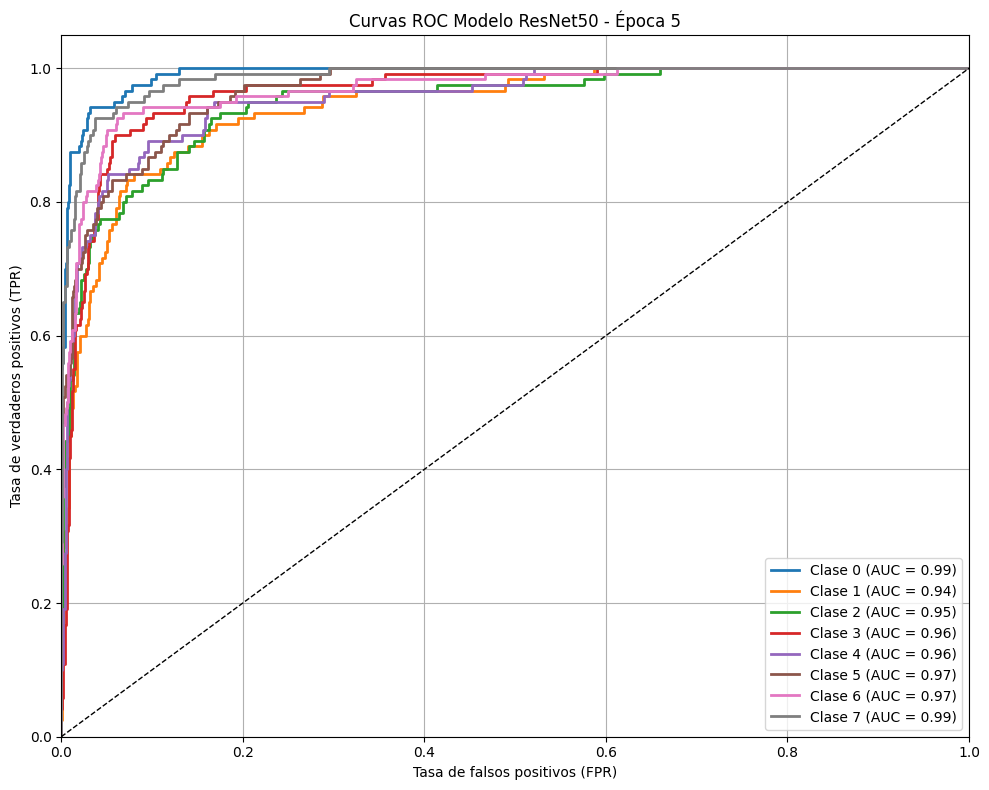

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_label_tensor_resnet50.numpy(), classes=list(range(num_classes)))
y_score = prob_tensor_resnet50.numpy()

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo ResNet50 - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


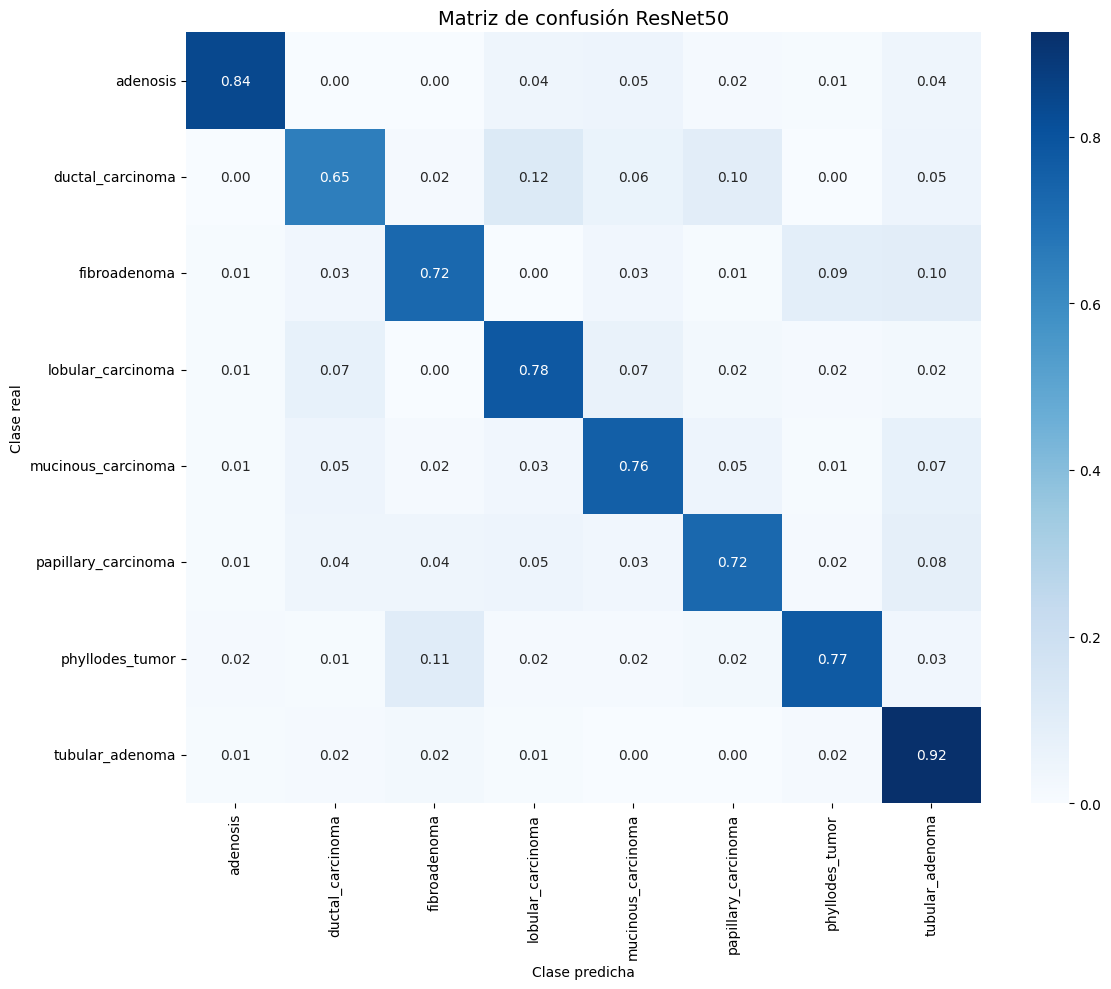

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tensores 1D con etiquetas de clase
true_labels = true_label_tensor_resnet50.numpy()
pred_labels = pred_label_tensor_resnet50.numpy()

# Calcular matriz de confusión (sin normalizar)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Normalizar por fila para obtener proporciones (evitar división por cero)
conf_matrix_norm = conf_matrix.astype('float') / (conf_matrix.sum(axis=1, keepdims=True) + 1e-6)

# Visualizar matriz normalizada
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.title("Matriz de confusión ResNet50", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## MODEL DesNet

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm

# Cargar DenseNet con pesos preentrenados
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
# model.classifier = nn.Sequential(
#     nn.Dropout(p=0.4),
#     nn.Linear(model.classifier.in_features, num_classes)
# )
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # prueba con 1e-3, 1e-4, 5e-5...
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=2, gamma=0.5)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader_16, desc=f"Entrenando (época {epoch+1})"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Entrenamiento época {epoch+1} - Loss DenseNet: {running_loss / len(train_loader_16):.4f}")

    model.eval()
    with torch.no_grad():
        pred_labels_densenet = []
        true_labels_densenet = []
        all_probs_densenet = []

        for images, labels in test_loader_16:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            predicted_classes = torch.argmax(probabilities, dim=1)

            pred_labels_densenet.append(predicted_classes.cpu())
            true_labels_densenet.append(labels.cpu())
            all_probs_densenet.append(probabilities.cpu())

        pred_label_tensor_densenet = torch.cat(pred_labels_densenet)
        true_label_tensor_densenet = torch.cat(true_labels_densenet)
        prob_tensor_densenet = torch.cat(all_probs_densenet)

        acc_densenet = (pred_label_tensor_densenet == true_label_tensor_densenet).float().mean()
        print(f"Evaluación época {epoch+1} - Accuracy DenseNet: {acc_densenet:.4f}")


8
Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.4, inplace=False)
  (1): Linear(in_features=1024, out_features=8, bias=True)
)


Entrenando (época 1): 100%|██████████| 70/70 [09:59<00:00,  8.57s/it]


Entrenamiento época 1 - Loss DenseNet: 1.8457
Evaluación época 1 - Accuracy DenseNet: 0.4958


Entrenando (época 2): 100%|██████████| 70/70 [10:30<00:00,  9.01s/it]


Entrenamiento época 2 - Loss DenseNet: 1.0857
Evaluación época 2 - Accuracy DenseNet: 0.6167


Entrenando (época 3): 100%|██████████| 70/70 [10:49<00:00,  9.27s/it]


Entrenamiento época 3 - Loss DenseNet: 0.6791
Evaluación época 3 - Accuracy DenseNet: 0.6792


Entrenando (época 4): 100%|██████████| 70/70 [10:37<00:00,  9.11s/it]


Entrenamiento época 4 - Loss DenseNet: 0.4324
Evaluación época 4 - Accuracy DenseNet: 0.6833


Entrenando (época 5): 100%|██████████| 70/70 [10:35<00:00,  9.08s/it]


Entrenamiento época 5 - Loss DenseNet: 0.2742
Evaluación época 5 - Accuracy DenseNet: 0.6917


In [ ]:
import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
import os
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.optim as optim
from tqdm import tqdm

# Cargar DenseNet con pesos preentrenados
model = densenet121(weights=DenseNet121_Weights.DEFAULT)

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Reemplazar la última capa del clasificador
model.classifier = nn.Linear(model.classifier.in_features, num_classes)

# --- Enfoque 1: solo entrenar la última capa -----
# Fine-tuning total
for param in model.parameters():
    param.requires_grad = True
# -----------------------------------------------

# model.classifier = nn.Sequential(
#     nn.Dropout(p=0.4),
#     nn.Linear(model.classifier.in_features, num_classes)
# )
print(f"Modelo modificado (última capa): {model.classifier}")
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # prueba con 1e-3, 1e-4, 5e-5...
optimizer = torch.optim.Adam(densenet.parameters(), lr=1e-5)
# optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=2, gamma=0.5)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader_32, desc=f"Entrenando (época {epoch+1})"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Entrenamiento época {epoch+1} - Loss DenseNet: {running_loss / len(train_loader_32):.4f}")

    model.eval()
    with torch.no_grad():
        pred_labels_densenet = []
        true_labels_densenet = []
        all_probs_densenet = []

        for images, labels in test_loader_32:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            predicted_classes = torch.argmax(probabilities, dim=1)

            pred_labels_densenet.append(predicted_classes.cpu())
            true_labels_densenet.append(labels.cpu())
            all_probs_densenet.append(probabilities.cpu())

        pred_label_tensor_densenet = torch.cat(pred_labels_densenet)
        true_label_tensor_densenet = torch.cat(true_labels_densenet)
        prob_tensor_densenet = torch.cat(all_probs_densenet)

        acc_densenet = (pred_label_tensor_densenet == true_label_tensor_densenet).float().mean()
        print(f"Evaluación época {epoch+1} - Accuracy DenseNet: {acc_densenet:.4f}")


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 84.5MB/s]


8
Modelo modificado (última capa): Sequential(
  (0): Dropout(p=0.4, inplace=False)
  (1): Linear(in_features=1024, out_features=8, bias=True)
)


Entrenando (época 1): 100%|██████████| 35/35 [10:32<00:00, 18.06s/it]


Entrenamiento época 1 - Loss DenseNet: 1.9150
Evaluación época 1 - Accuracy DenseNet: 0.4500


Entrenando (época 2): 100%|██████████| 35/35 [10:03<00:00, 17.25s/it]


Entrenamiento época 2 - Loss DenseNet: 1.1645
Evaluación época 2 - Accuracy DenseNet: 0.5562


Entrenando (época 3): 100%|██████████| 35/35 [10:10<00:00, 17.44s/it]


Entrenamiento época 3 - Loss DenseNet: 0.7275
Evaluación época 3 - Accuracy DenseNet: 0.6354


Entrenando (época 4): 100%|██████████| 35/35 [10:26<00:00, 17.91s/it]


Entrenamiento época 4 - Loss DenseNet: 0.4253
Evaluación época 4 - Accuracy DenseNet: 0.6417


Entrenando (época 5): 100%|██████████| 35/35 [10:36<00:00, 18.19s/it]


Entrenamiento época 5 - Loss DenseNet: 0.2420
Evaluación época 5 - Accuracy DenseNet: 0.6500


In [ ]:
pred_label_tensor_densenet = torch.cat(pred_labels_densenet)  # [N]
true_label_tensor_densenet = torch.cat(true_labels_densenet)  # [N]
prob_tensor_densenet = torch.cat(all_probs_densenet)          # [N, num_classes]
print(prob_tensor_densenet.shape)
print(pred_label_tensor_densenet.shape)
print(true_label_tensor_densenet.shape)

torch.Size([480, 8])
torch.Size([480])
torch.Size([480])


In [ ]:
from sklearn.metrics import classification_report

true_labels_densenet = true_label_tensor_densenet.numpy()
pred_labels_densenet = pred_label_tensor_densenet.numpy()
print(classification_report(
    true_labels_densenet,
    pred_labels_densenet,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

                     precision    recall  f1-score   support

           adenosis       0.76      0.83      0.79        60
   ductal_carcinoma       0.53      0.58      0.56        60
       fibroadenoma       0.55      0.48      0.51        60
  lobular_carcinoma       0.71      0.65      0.68        60
 mucinous_carcinoma       0.57      0.57      0.57        60
papillary_carcinoma       0.75      0.80      0.77        60
    phyllodes_tumor       0.72      0.43      0.54        60
    tubular_adenoma       0.64      0.85      0.73        60

           accuracy                           0.65       480
          macro avg       0.65      0.65      0.64       480
       weighted avg       0.65      0.65      0.64       480



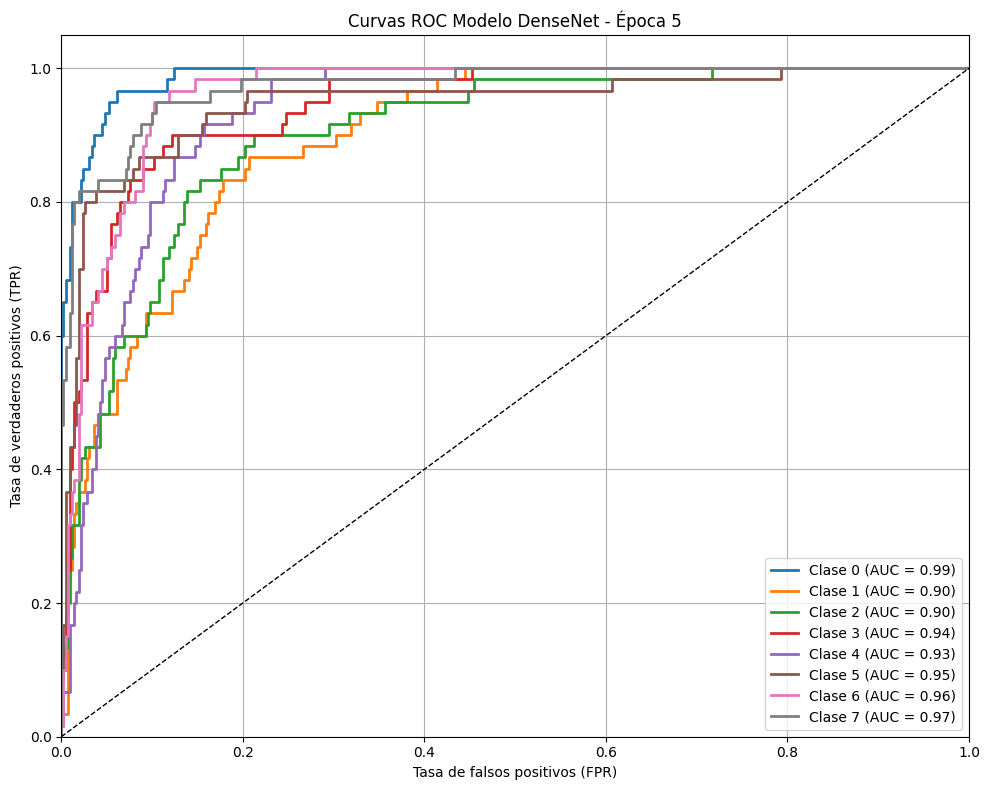

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_label_tensor_densenet.numpy(), classes=list(range(num_classes)))
y_score = prob_tensor_densenet.numpy()

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo DenseNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


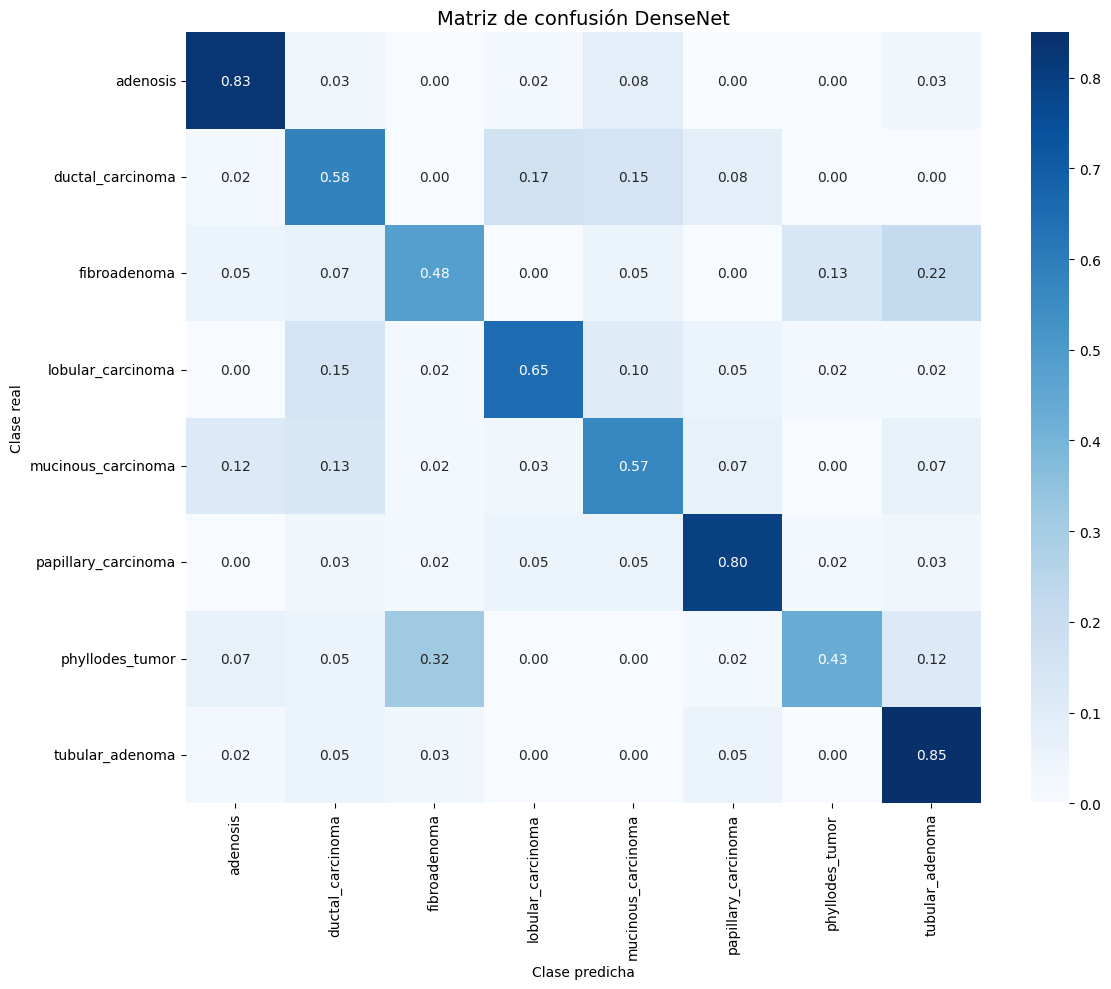

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tensores 1D con etiquetas de clase
true_labels = true_label_tensor_densenet.numpy()
pred_labels = pred_label_tensor_densenet.numpy()

# Calcular matriz de confusión (sin normalizar)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Normalizar por fila para obtener proporciones (evitar división por cero)
conf_matrix_norm = conf_matrix.astype('float') / (conf_matrix.sum(axis=1, keepdims=True) + 1e-6)

# Visualizar matriz normalizada
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.title("Matriz de confusión DenseNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## MODEL AlexNet

In [ ]:
# Input:         227 x 227 x 3   ← originalmente usaba 227×227 (no 224)
# Conv1:         11×11, stride 4 → [55 x 55 x 96]
# MaxPool        → [27 x 27 x 96]

# Conv2:         5×5, pad 2      → [27 x 27 x 256]
# MaxPool        → [13 x 13 x 256]

# Conv3:         3×3, pad 1      → [13 x 13 x 384]
# Conv4:         3×3, pad 1      → [13 x 13 x 384]
# Conv5:         3×3, pad 1      → [13 x 13 x 256]
# MaxPool        → [6 x 6 x 256]

# Flatten:       → [9216]

# FC1:           → 4096
# FC2:           → 4096
# FC3 (output):  → 1000 (clases)



In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Cargar AlexNet con pesos preentrenados
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")  # Verificar la capa final
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # prueba con 1e-3, 1e-4, 5e-5...
# optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.001)
optimizer = optim.Adam(model.parameters(), lr=5e-5, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=2, gamma=0.5)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader_16, desc=f"Entrenando (época {epoch+1})"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Entrenamiento época {epoch+1} - Loss AlexNet: {running_loss / len(train_loader_16):.4f}")

    model.eval()
    with torch.no_grad():
        pred_labels_alexnet = []
        true_labels_alexnet = []
        all_probs_alexnet = []

        for images, labels in test_loader_16:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            predicted_classes = torch.argmax(probabilities, dim=1)

            pred_labels_alexnet.append(predicted_classes.cpu())
            true_labels_alexnet.append(labels.cpu())
            all_probs_alexnet.append(probabilities.cpu())

        pred_label_tensor_alexnet = torch.cat(pred_labels_alexnet)
        true_label_tensor_alexnet = torch.cat(true_labels_alexnet)
        prob_tensor_alexnet = torch.cat(all_probs_alexnet)

        acc_alexnet = (pred_label_tensor_alexnet == true_label_tensor_alexnet).float().mean()
        print(f"Evaluación época {epoch+1} - Accuracy AlexNet: {acc_alexnet:.4f}")



Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 92.8MB/s]


8
Modelo modificado (última capa): Linear(in_features=4096, out_features=8, bias=True)



Entrenando (época 1): 100%|██████████| 70/70 [02:47<00:00,  2.39s/it]


Entrenamiento época 1 - Loss AlexNet: 1.8714
Evaluación época 1 - Accuracy AlexNet: 0.3812


Entrenando (época 2): 100%|██████████| 70/70 [02:33<00:00,  2.20s/it]


Entrenamiento época 2 - Loss AlexNet: 1.3564
Evaluación época 2 - Accuracy AlexNet: 0.4646


Entrenando (época 3): 100%|██████████| 70/70 [02:33<00:00,  2.20s/it]


Entrenamiento época 3 - Loss AlexNet: 0.9753
Evaluación época 3 - Accuracy AlexNet: 0.5875


Entrenando (época 4): 100%|██████████| 70/70 [02:40<00:00,  2.30s/it]


Entrenamiento época 4 - Loss AlexNet: 0.7869
Evaluación época 4 - Accuracy AlexNet: 0.5312


Entrenando (época 5): 100%|██████████| 70/70 [02:30<00:00,  2.15s/it]


Entrenamiento época 5 - Loss AlexNet: 0.5129
Evaluación época 5 - Accuracy AlexNet: 0.5708


In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Cargar AlexNet con pesos preentrenados
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")  # Verificar la capa final
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # prueba con 1e-3, 1e-4, 5e-5...
# optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.001)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=2, gamma=0.5)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader_32, desc=f"Entrenando (época {epoch+1})"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Entrenamiento época {epoch+1} - Loss AlexNet: {running_loss / len(train_loader_32):.4f}")

    model.eval()
    with torch.no_grad():
        pred_labels_alexnet = []
        true_labels_alexnet = []
        all_probs_alexnet = []

        for images, labels in test_loader_32:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            predicted_classes = torch.argmax(probabilities, dim=1)

            pred_labels_alexnet.append(predicted_classes.cpu())
            true_labels_alexnet.append(labels.cpu())
            all_probs_alexnet.append(probabilities.cpu())

        pred_label_tensor_alexnet = torch.cat(pred_labels_alexnet)
        true_label_tensor_alexnet = torch.cat(true_labels_alexnet)
        prob_tensor_alexnet = torch.cat(all_probs_alexnet)

        acc_alexnet = (pred_label_tensor_alexnet == true_label_tensor_alexnet).float().mean()
        print(f"Evaluación época {epoch+1} - Accuracy AlexNet: {acc_alexnet:.4f}")



8
Modelo modificado (última capa): Linear(in_features=4096, out_features=8, bias=True)



Entrenando (época 1): 100%|██████████| 35/35 [02:06<00:00,  3.60s/it]


Entrenamiento época 1 - Loss AlexNet: 1.9002
Evaluación época 1 - Accuracy AlexNet: 0.3812


Entrenando (época 2): 100%|██████████| 35/35 [02:00<00:00,  3.43s/it]


Entrenamiento época 2 - Loss AlexNet: 1.3505
Evaluación época 2 - Accuracy AlexNet: 0.4979


Entrenando (época 3): 100%|██████████| 35/35 [02:01<00:00,  3.47s/it]


Entrenamiento época 3 - Loss AlexNet: 0.9584
Evaluación época 3 - Accuracy AlexNet: 0.5125


Entrenando (época 4): 100%|██████████| 35/35 [02:09<00:00,  3.71s/it]


Entrenamiento época 4 - Loss AlexNet: 0.6584
Evaluación época 4 - Accuracy AlexNet: 0.4938


Entrenando (época 5): 100%|██████████| 35/35 [02:00<00:00,  3.45s/it]


Entrenamiento época 5 - Loss AlexNet: 0.5298
Evaluación época 5 - Accuracy AlexNet: 0.5000


In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import alexnet, AlexNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Cargar AlexNet con pesos preentrenados
model = alexnet(weights=AlexNet_Weights.DEFAULT)

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Reemplazar la última capa del clasificador
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
print(f"Modelo modificado (última capa): {model.classifier}\n")  # Verificar la capa final
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # prueba con 1e-3, 1e-4, 5e-5...
# optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.001)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=2, gamma=0.5)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader_32, desc=f"Entrenando (época {epoch+1})"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Entrenamiento época {epoch+1} - Loss AlexNet: {running_loss / len(train_loader_32):.4f}")

    model.eval()
    with torch.no_grad():
        pred_labels_alexnet = []
        true_labels_alexnet = []
        all_probs_alexnet = []

        for images, labels in test_loader_32:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            predicted_classes = torch.argmax(probabilities, dim=1)

            pred_labels_alexnet.append(predicted_classes.cpu())
            true_labels_alexnet.append(labels.cpu())
            all_probs_alexnet.append(probabilities.cpu())

        pred_label_tensor_alexnet = torch.cat(pred_labels_alexnet)
        true_label_tensor_alexnet = torch.cat(true_labels_alexnet)
        prob_tensor_alexnet = torch.cat(all_probs_alexnet)

        acc_alexnet = (pred_label_tensor_alexnet == true_label_tensor_alexnet).float().mean()
        print(f"Evaluación época {epoch+1} - Accuracy AlexNet: {acc_alexnet:.4f}")



8
Modelo modificado (última capa): Linear(in_features=4096, out_features=8, bias=True)



Entrenando (época 1): 100%|██████████| 35/35 [02:06<00:00,  3.62s/it]


Entrenamiento época 1 - Loss AlexNet: 1.8896
Evaluación época 1 - Accuracy AlexNet: 0.4083


Entrenando (época 2): 100%|██████████| 35/35 [02:01<00:00,  3.47s/it]


Entrenamiento época 2 - Loss AlexNet: 1.3910
Evaluación época 2 - Accuracy AlexNet: 0.5229


Entrenando (época 3): 100%|██████████| 35/35 [02:02<00:00,  3.50s/it]


Entrenamiento época 3 - Loss AlexNet: 1.0977
Evaluación época 3 - Accuracy AlexNet: 0.5250


Entrenando (época 4): 100%|██████████| 35/35 [02:00<00:00,  3.43s/it]


Entrenamiento época 4 - Loss AlexNet: 0.7776
Evaluación época 4 - Accuracy AlexNet: 0.5667


Entrenando (época 5): 100%|██████████| 35/35 [02:00<00:00,  3.43s/it]


Entrenamiento época 5 - Loss AlexNet: 0.4558
Evaluación época 5 - Accuracy AlexNet: 0.6062


In [ ]:
from sklearn.metrics import classification_report

true_labels_alexnet = true_label_tensor_alexnet.numpy()
pred_labels_alexnet = pred_label_tensor_alexnet.numpy()
print(classification_report(
    true_labels_alexnet,
    pred_labels_alexnet,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))

                     precision    recall  f1-score   support

           adenosis       0.81      0.73      0.77        60
   ductal_carcinoma       0.44      0.47      0.46        60
       fibroadenoma       0.47      0.63      0.54        60
  lobular_carcinoma       0.57      0.62      0.59        60
 mucinous_carcinoma       0.55      0.28      0.37        60
papillary_carcinoma       0.63      0.87      0.73        60
    phyllodes_tumor       0.66      0.42      0.51        60
    tubular_adenoma       0.76      0.83      0.79        60

           accuracy                           0.61       480
          macro avg       0.61      0.61      0.60       480
       weighted avg       0.61      0.61      0.60       480



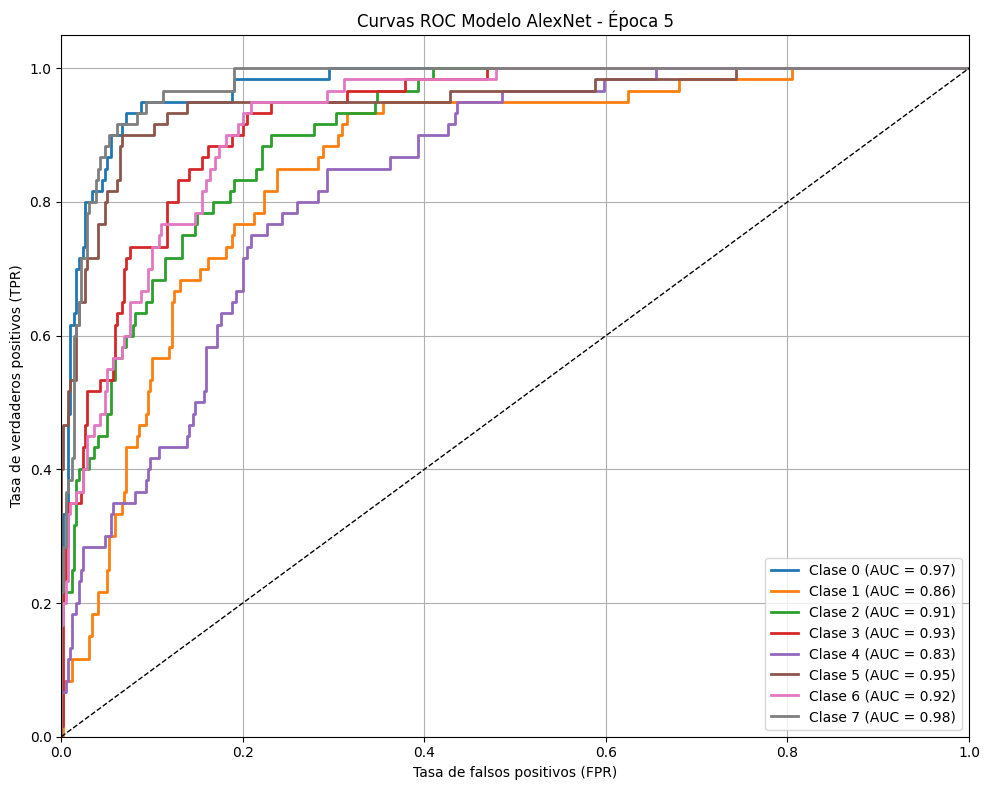

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_label_tensor_alexnet.numpy(), classes=list(range(num_classes)))
y_score = prob_tensor_alexnet.numpy()

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo AlexNet - Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


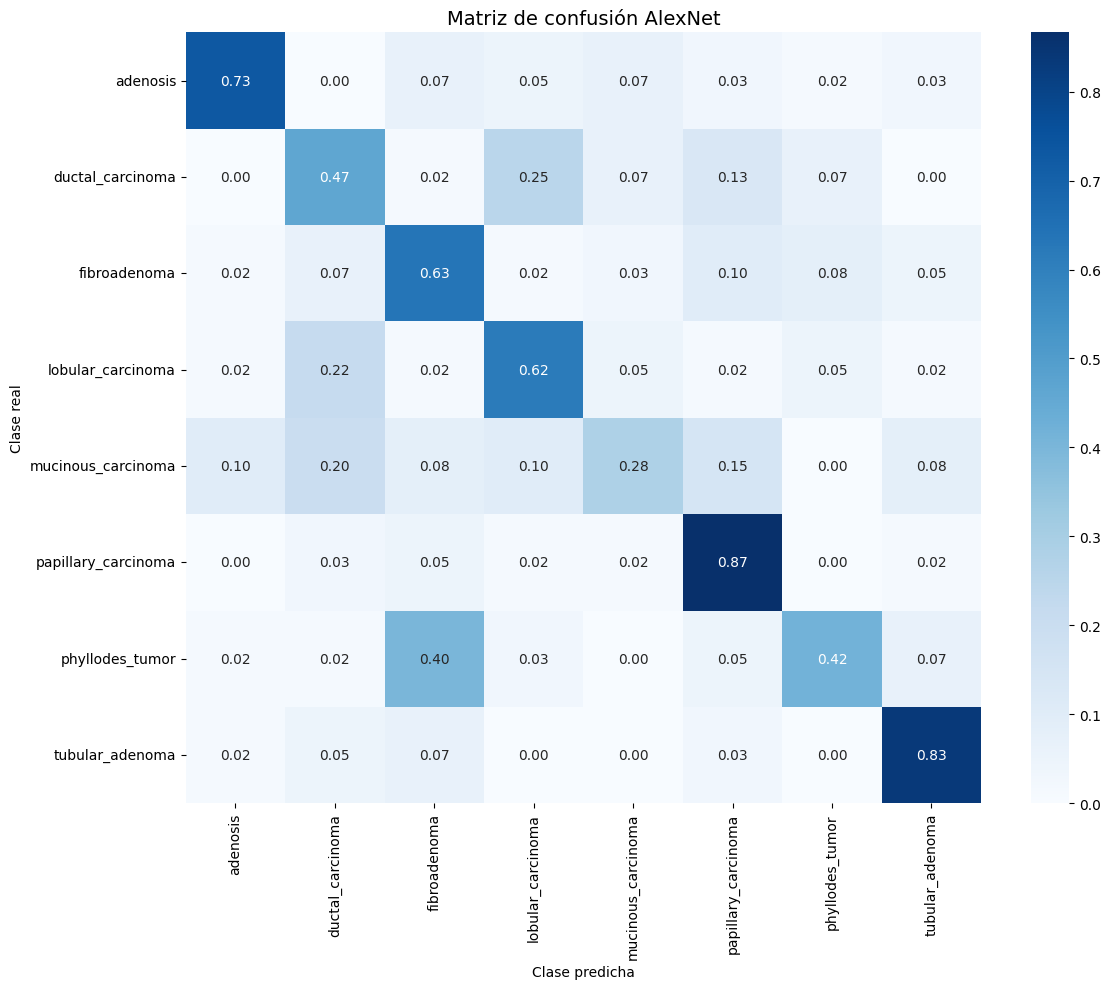

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tensores 1D con etiquetas de clase
true_labels = true_label_tensor_alexnet.numpy()
pred_labels = pred_label_tensor_alexnet.numpy()

# Calcular matriz de confusión (sin normalizar)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Normalizar por fila para obtener proporciones (evitar división por cero)
conf_matrix_norm = conf_matrix.astype('float') / (conf_matrix.sum(axis=1, keepdims=True) + 1e-6)

# Visualizar matriz normalizada
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.title("Matriz de confusión AlexNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## MODEL GoogLeNet

In [ ]:
# Input:            224 x 224 x 3
# Conv + ReLU:      112 x 112 x 64
# → Módulos Inception múltiples:
#    - 1x1, 3x3, 5x5 convs + pooling
#    - concatenados a lo largo de canales
# Output Inception: 7 x 7 x 1024
# AvgPool:          1 x 1 x 1024
# Flatten:          1024
# FC:               1000 classes


In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import googlenet, GoogLeNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

model = googlenet(weights=GoogLeNet_Weights.DEFAULT)

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Reemplazar la capa fully connected final
# model.fc = nn.Linear(model.fc.in_features, num_classes)
model.fc = nn.Sequential(
    nn.Dropout(p=0.4),
    nn.Linear(model.fc.in_features, num_classes)
)

# Reemplazar las salidas auxiliares si se usan
if model.aux_logits:
    # model.aux1.fc2 = nn.Linear(model.aux1.fc2.in_features, num_classes)
    # model.aux2.fc2 = nn.Linear(model.aux2.fc2.in_features, num_classes)
    model.aux1.fc2 = nn.Sequential(
        nn.Dropout(p=0.4),
        nn.Linear(model.aux1.fc2.in_features, num_classes)
    )
    model.aux2.fc2 = nn.Sequential(
        nn.Dropout(p=0.4),
        nn.Linear(model.aux2.fc2.in_features, num_classes)
    )
print(f"Modelo googlenet modificado (última capa): {model.fc}")
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # prueba con 1e-3, 1e-4, 5e-5...
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=2, gamma=0.5)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader_16, desc=f"Entrenando (época {epoch+1})"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Entrenamiento época {epoch+1} - Loss GoogLeNet: {running_loss / len(train_loader_16):.4f}")

    model.eval()
    with torch.no_grad():
        pred_labels_googlenet = []
        true_labels_googlenet = []
        all_probs_googlenet = []

        for images, labels in test_loader_16:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)  # tamaño [batch_size, num_classes]
            probabilities = torch.softmax(outputs, dim=1)  # Convertir logits a probabilidades
            predicted_classes = torch.argmax(probabilities, dim=1)

            pred_labels_googlenet.append(predicted_classes.cpu())
            true_labels_googlenet.append(labels.cpu())
            all_probs_googlenet.append(probabilities.cpu())

        pred_label_tensor_googlenet = torch.cat(pred_labels_googlenet)  # [N]
        true_label_tensor_googlenet = torch.cat(true_labels_googlenet)  # [N]
        prob_tensor_googlenet = torch.cat(all_probs_googlenet)          # [N, num_classes]

        acc_googlenet = (pred_label_tensor_googlenet == true_label_tensor_googlenet).float().mean()
        print(f"Evaluación época {epoch+1} - Accuracy GoogLeNet: {acc_googlenet:.4f}")


8
Modelo googlenet modificado (última capa): Sequential(
  (0): Dropout(p=0.4, inplace=False)
  (1): Linear(in_features=1024, out_features=8, bias=True)
)


Entrenando (época 1): 100%|██████████| 70/70 [06:46<00:00,  5.80s/it]


Entrenamiento época 1 - Loss GoogLeNet: 1.9613
Evaluación época 1 - Accuracy GoogLeNet: 0.4104


Entrenando (época 2): 100%|██████████| 70/70 [06:23<00:00,  5.47s/it]


Entrenamiento época 2 - Loss GoogLeNet: 1.5011
Evaluación época 2 - Accuracy GoogLeNet: 0.5854


Entrenando (época 3): 100%|██████████| 70/70 [06:26<00:00,  5.52s/it]


Entrenamiento época 3 - Loss GoogLeNet: 1.0715
Evaluación época 3 - Accuracy GoogLeNet: 0.6375


Entrenando (época 4): 100%|██████████| 70/70 [06:24<00:00,  5.50s/it]


Entrenamiento época 4 - Loss GoogLeNet: 0.7631
Evaluación época 4 - Accuracy GoogLeNet: 0.6917


Entrenando (época 5): 100%|██████████| 70/70 [06:26<00:00,  5.53s/it]


Entrenamiento época 5 - Loss GoogLeNet: 0.5364
Evaluación época 5 - Accuracy GoogLeNet: 0.6750


In [ ]:
import os
from PIL import Image
import torch
from torchvision.models import googlenet, GoogLeNet_Weights
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

model = googlenet(weights=GoogLeNet_Weights.DEFAULT)

# Número de clases
num_classes = len(class_map.keys())
print(num_classes)

# Reemplazar la capa fully connected final
# model.fc = nn.Linear(model.fc.in_features, num_classes)
model.fc = nn.Sequential(
    nn.Dropout(p=0.4),
    nn.Linear(model.fc.in_features, num_classes)
)

# Reemplazar las salidas auxiliares si se usan
if model.aux_logits:
    # model.aux1.fc2 = nn.Linear(model.aux1.fc2.in_features, num_classes)
    # model.aux2.fc2 = nn.Linear(model.aux2.fc2.in_features, num_classes)
    model.aux1.fc2 = nn.Sequential(
        nn.Dropout(p=0.4),
        nn.Linear(model.aux1.fc2.in_features, num_classes)
    )
    model.aux2.fc2 = nn.Sequential(
        nn.Dropout(p=0.4),
        nn.Linear(model.aux2.fc2.in_features, num_classes)
    )
print(f"Modelo googlenet modificado (última capa): {model.fc}")
model = model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # prueba con 1e-3, 1e-4, 5e-5...
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=2, gamma=0.5)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader_16, desc=f"Entrenando (época {epoch+1})"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Entrenamiento época {epoch+1} - Loss GoogLeNet: {running_loss / len(train_loader_16):.4f}")

    model.eval()
    with torch.no_grad():
        pred_labels_googlenet = []
        true_labels_googlenet = []
        all_probs_googlenet = []

        for images, labels in test_loader_16:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)  # tamaño [batch_size, num_classes]
            probabilities = torch.softmax(outputs, dim=1)  # Convertir logits a probabilidades
            predicted_classes = torch.argmax(probabilities, dim=1)

            pred_labels_googlenet.append(predicted_classes.cpu())
            true_labels_googlenet.append(labels.cpu())
            all_probs_googlenet.append(probabilities.cpu())

        pred_label_tensor_googlenet = torch.cat(pred_labels_googlenet)  # [N]
        true_label_tensor_googlenet = torch.cat(true_labels_googlenet)  # [N]
        prob_tensor_googlenet = torch.cat(all_probs_googlenet)          # [N, num_classes]

        acc_googlenet = (pred_label_tensor_googlenet == true_label_tensor_googlenet).float().mean()
        print(f"Evaluación época {epoch+1} - Accuracy GoogLeNet: {acc_googlenet:.4f}")


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 51.7MB/s]


8


Entrenando (época 1): 100%|██████████| 35/35 [04:59<00:00,  8.57s/it]


Entrenamiento época 1 - Loss GoogLeNet: 1.9816
Evaluación época 1 - Accuracy GoogLeNet: 0.4229


Entrenando (época 2): 100%|██████████| 35/35 [05:20<00:00,  9.15s/it]


Entrenamiento época 2 - Loss GoogLeNet: 1.4798
Evaluación época 2 - Accuracy GoogLeNet: 0.5000


Entrenando (época 3): 100%|██████████| 35/35 [05:23<00:00,  9.25s/it]


Entrenamiento época 3 - Loss GoogLeNet: 1.0395
Evaluación época 3 - Accuracy GoogLeNet: 0.5750


Entrenando (época 4): 100%|██████████| 35/35 [04:54<00:00,  8.40s/it]


Entrenamiento época 4 - Loss GoogLeNet: 0.6811
Evaluación época 4 - Accuracy GoogLeNet: 0.6187


Entrenando (época 5): 100%|██████████| 35/35 [04:51<00:00,  8.32s/it]


Entrenamiento época 5 - Loss GoogLeNet: 0.4220
Evaluación época 5 - Accuracy GoogLeNet: 0.6438


In [ ]:
from sklearn.metrics import classification_report

true_labels_googlenet = true_label_tensor_googlenet.numpy()
pred_labels_googlenet = pred_label_tensor_googlenet.numpy()
print(classification_report(
    true_labels_googlenet,
    pred_labels_googlenet,
    labels=list(range(len(class_map))),
    target_names=class_map.keys(),
    zero_division=0
))


                     precision    recall  f1-score   support

           adenosis       0.77      0.90      0.83        60
   ductal_carcinoma       0.49      0.63      0.55        60
       fibroadenoma       0.65      0.50      0.57        60
  lobular_carcinoma       0.86      0.50      0.63        60
 mucinous_carcinoma       0.59      0.67      0.62        60
papillary_carcinoma       0.75      0.70      0.72        60
    phyllodes_tumor       0.63      0.72      0.67        60
    tubular_adenoma       0.78      0.78      0.78        60

           accuracy                           0.68       480
          macro avg       0.69      0.68      0.67       480
       weighted avg       0.69      0.68      0.67       480



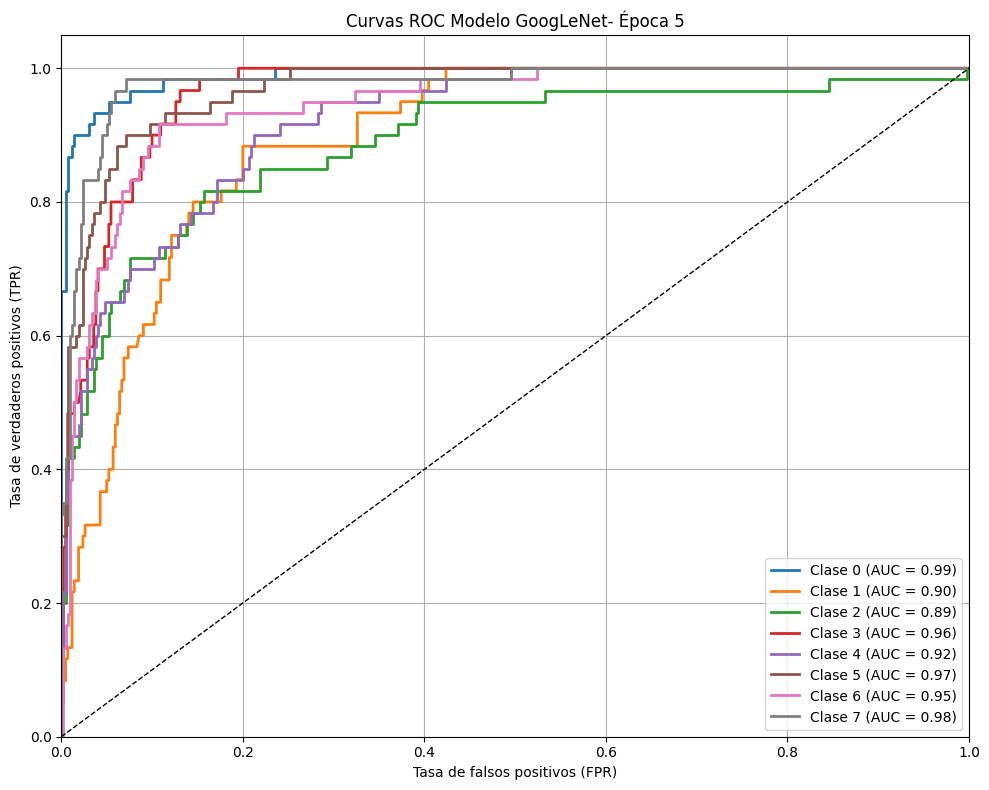

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binariza etiquetas verdaderas (one-hot)
y_true_bin = label_binarize(true_label_tensor_googlenet.numpy(), classes=list(range(num_classes)))
y_score = prob_tensor_googlenet.numpy()

# Curva ROC por clase
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curvas ROC Modelo GoogLeNet- Época {epoch+1}")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


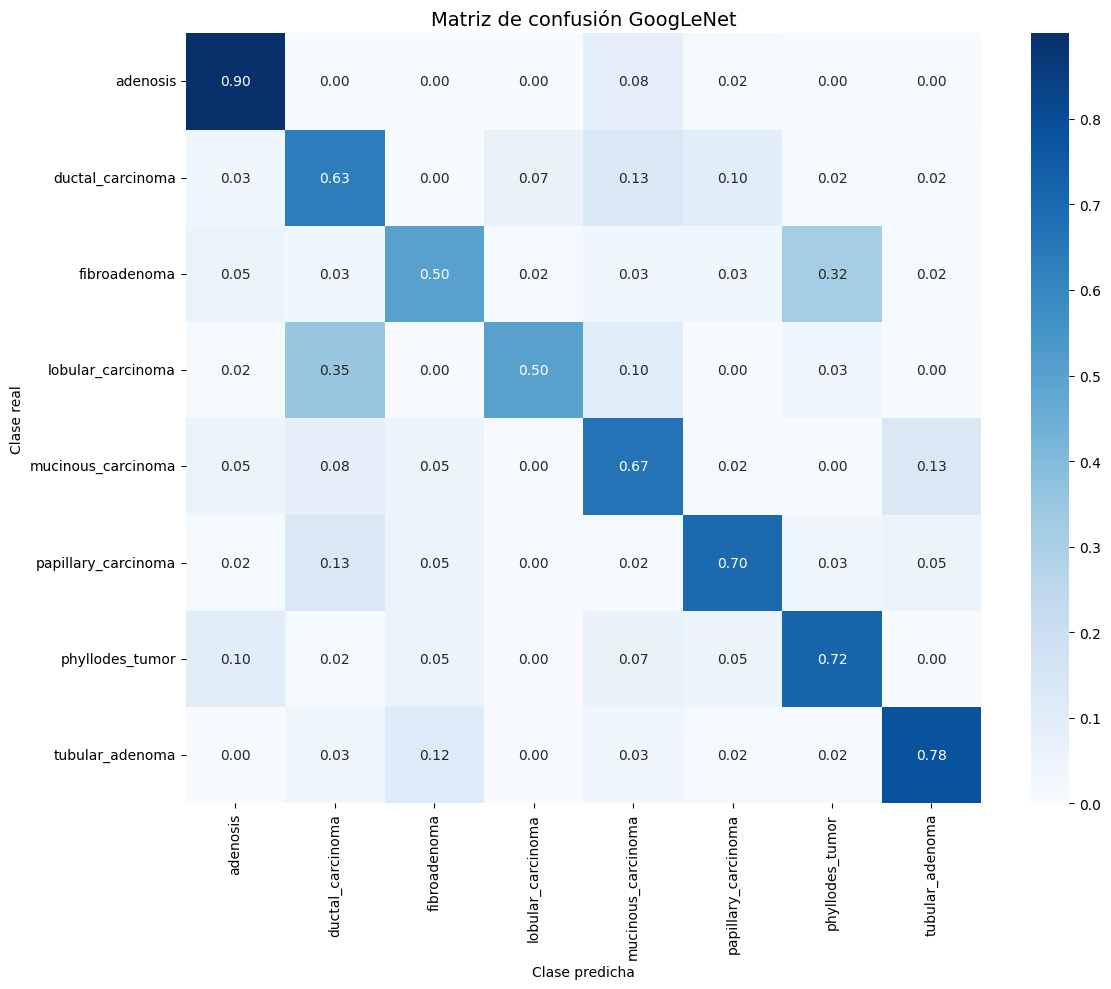

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tensores 1D con etiquetas de clase
true_labels = true_label_tensor_googlenet.numpy()
pred_labels = pred_label_tensor_googlenet.numpy()

# Calcular matriz de confusión (sin normalizar)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Normalizar por fila para obtener proporciones (evitar división por cero)
conf_matrix_norm = conf_matrix.astype('float') / (conf_matrix.sum(axis=1, keepdims=True) + 1e-6)

# Visualizar matriz normalizada
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(class_map.keys()), yticklabels=list(class_map.keys()))
plt.title("Matriz de confusión GoogLeNet", fontsize=14)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## ESQUEMA DE MODELOS CNN

### Modelo ResNet50

In [ ]:
from torchvision.models import (
    resnet18, ResNet18_Weights,
    resnet50, ResNet50_Weights,
    alexnet, AlexNet_Weights,
    vgg16, VGG16_Weights,
    squeezenet1_0, SqueezeNet1_0_Weights,
    densenet121, DenseNet121_Weights,
    mobilenet_v2, MobileNet_V2_Weights,
    efficientnet_b0, EfficientNet_B0_Weights,
    googlenet, GoogLeNet_Weights,
    shufflenet_v2_x1_0, ShuffleNet_V2_X1_0_Weights,
)

model = resnet50(weights=ResNet50_Weights.DEFAULT)
model


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 158MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Modelo AlexNet

In [ ]:
from torchvision.models import (
    resnet18, ResNet18_Weights,
    resnet50, ResNet50_Weights,
    alexnet, AlexNet_Weights,
    vgg16, VGG16_Weights,
    squeezenet1_0, SqueezeNet1_0_Weights,
    densenet121, DenseNet121_Weights,
    mobilenet_v2, MobileNet_V2_Weights,
    efficientnet_b0, EfficientNet_B0_Weights,
    googlenet, GoogLeNet_Weights,
    shufflenet_v2_x1_0, ShuffleNet_V2_X1_0_Weights,
)

model = alexnet(weights=AlexNet_Weights.DEFAULT)
model


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 76.5MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Modelo DenseNet

In [ ]:
from torchvision.models import (
    resnet18, ResNet18_Weights,
    resnet50, ResNet50_Weights,
    alexnet, AlexNet_Weights,
    vgg16, VGG16_Weights,
    squeezenet1_0, SqueezeNet1_0_Weights,
    densenet121, DenseNet121_Weights,
    mobilenet_v2, MobileNet_V2_Weights,
    efficientnet_b0, EfficientNet_B0_Weights,
    googlenet, GoogLeNet_Weights,
    shufflenet_v2_x1_0, ShuffleNet_V2_X1_0_Weights,
)

model = densenet121(weights=DenseNet121_Weights.DEFAULT)
model

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 65.3MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

### Modelo GoogLeNet

In [ ]:
from torchvision.models import (
    resnet18, ResNet18_Weights,
    resnet50, ResNet50_Weights,
    alexnet, AlexNet_Weights,
    vgg16, VGG16_Weights,
    squeezenet1_0, SqueezeNet1_0_Weights,
    densenet121, DenseNet121_Weights,
    mobilenet_v2, MobileNet_V2_Weights,
    efficientnet_b0, EfficientNet_B0_Weights,
    googlenet, GoogLeNet_Weights,
    shufflenet_v2_x1_0, ShuffleNet_V2_X1_0_Weights,
)

model = googlenet(weights=GoogLeNet_Weights.DEFAULT)
model


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 79.5MB/s]


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track